# Cervical Cancer Risk Classification Challenge

- Part 1: EDA
Extract the data from the csv file and use some techniques to gain insights. 

- Part 2: ETL
Clean the data and prepare it to be loaded in the next step.

- Part 3: Modeling
Create some Machine Learning models to predict the classification, choose the best model in your opinion, justify your election and make it as prepared as you can to be ready for deployment.

- Part 4: Interpret
Explain your results using metrics and visualizations techniques and write a short post in which you try to explain the project and your work to a non-technical audience.


In [1]:
# Built-in
import os
import pandas as pd

# Third-party
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
import plotly.express as px
import plotly.figure_factory as ff
from scipy.stats import gaussian_kde

ModuleNotFoundError: No module named 'seaborn'

## Clinic Information:

- "HPV has been associated with the development of cervical cancer in females, genital warts, and other anogenital cancers." Extrated from [2]().

- "...the relative risks of cervical cancer increased with increasing duration of use: for durations of approximately less than 5 years, 5–9 years, and 10 or more years, respectively, the summary relative risks were 1·1 (95% CI 1·1–1·2), 1·6 (1·4–1·7), and 2·2 (1·9–2·4) for all women; and 0·9 (0·7–1·2), 1·3 (1·0–1·9), and 2·5 (1·6–3·9) for HPV positive women" Extracted from [3]().

- "...The conclusion that the association between cigarette smoking and cervical cancer is causal and that a chemical carcinogen contained in tobacco smoke is responsible for a substantial proportion of the incidence of this disease." Extracted from [4]().

- "Lifetime number of male sexual partners and the sexual behaviour of the male sexual partners are associated with an increased risk of HPV infection. LAC women tend to remain monogamous once married or cohabiting, while men do not, thus increasing the risk of cervical cancer in their spouses or
their regular female partners." Extracted from [5]().



### References

- 2: [Risk factors for and prevention of human papillomaviruses (HPV), genital warts and cervical cancer.](https://www.sciencedirect.com/science/article/pii/S0163445312003106?casa_token=pv_KNCxntkwAAAAA:tcNXVL6Jl4J4Wbts93d4zQ4If_pUloTGa4mzLMQ8wJ3Fn_3LV8A0PwHYtwY9vlO38TZ8D-LHwQ): Chelimo, C., Wouldes, T. A., Cameron, L. D., & Elwood, J. M. (2013). Risk factors for and prevention of human papillomaviruses (HPV), genital warts and cervical cancer. Journal of Infection, 66(3), 207-217.

- 3: [Cervical cancer and use of hormonal contraceptives: a systematic review](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(03)12949-2/fulltext): Smith, J. S., Green, J., de Gonzalez, A. B., Appleby, P., Peto, J., Plummer, M., ... & Beral, V. (2003). Cervical cancer and use of hormonal contraceptives: a systematic review. The Lancet, 361(9364), 1159-1167.

- 4: [Smoking and cervical cancer—current status: a review](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=8ccdce22f030c7361465cf09d0cf6e71103f0dd5) Winkelstein Jr, W. (1990). Smoking and cervical cancer—current status: a review. American Journal of Epidemiology, 131(6), 945-957.

- 5: [Risk factors for human papillomavirus exposure and co-factors for cervical cancer in Latin America and the Caribbean.](https://www.sciencedirect.com/science/article/abs/pii/S0264410X08007238?casa_token=UUAAsyeuWekAAAAA:SOnEpY7F8YznTDLYBgicadh0kZMWHZaFuziMU-1yiV5m5o-h49f8dLLWvB-3rXQdWOMd8LBfsA) Almonte, M., Albero, G., Molano, M., Carcamo, C., García, P. J., & Pérez, G. (2008). Risk factors for human papillomavirus exposure and co-factors for cervical cancer in Latin America and the Caribbean. Vaccine, 26, L16-L36.


## Part 1 - Dataset 

This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records. This data is taken from [UCI Machine Learning Repository](https://archive-beta.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29#). The dataset was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela. The dataset comprises demographic information, habits, and historic medical records of 858 patients. Several patients decided not to answer some of the questions because of privacy concerns (missing values). Has Missing Values
Symbol: 1


### Attribute Information:

- `(int) Age`: The age of the individual.
- `(int) Number of sexual partners`: The number of sexual partners that the individual has had.
- `(int) First sexual intercourse (age)`: The age at which the individual first had sexual intercourse.
- `(int) Num of pregnancies`: The total number of pregnancies that the individual has had.
- `(bool) Smokes`: Indicates whether the individual currently smokes (1 for yes, 0 for no).
- `(float) Smokes (years)`: Number of years the individual has been smoking.
- `(float) Smokes (packs/year)`: The average number of cigarettes packs the individual smokes per year. 
- `(bool) Hormonal Contraceptives`: Indicates whether the individual is using hormonal contraceptives (1 for yes, 0 for no).
- `(float) Hormonal Contraceptives (years)`: Number of years the individual has been using hormonal contraceptives.
- `(bool) IUD`: Indicates whether the individual has an intrauterine device (1 for yes, 0 for no).
- `(float) IUD (years)`: Number of years the individual has had an IUD.
- `(bool) STDs`: Indicates whether the individual has a sexually transmitted disease (1 for yes, 0 for no).
- `(int) STDs (number)`: The total number of sexually transmitted diseases that the individual was diagnosed with.
- `(bool) STDs:condylomatosis`: Whether the individual has been diagnosed with condylomatosis (1 for yes, 0 for no).
- `(bool) STDs:cervical condylomatosis`: Whether the individual has been diagnosed with cervical condylomatosis (1 for yes, 0 for no).
- `(bool) STDs:vaginal condylomatosis`: Whether the individual has been diagnosed with vaginal condylomatosis (1 for yes, 0 for no).
- `(bool) STDs:vulvo-perineal condylomatosis`: Whether the individual has been diagnosed with vulvo-perineal condylomatosis (1 for yes, 0 for no).
- `(bool) STDs:syphilis`: Whether the individual has been diagnosed with syphilis (1 for yes, 0 for no).
- `(bool) STDs:pelvic inflammatory disease`: Whether the individual has been diagnosed with pelvic inflammatory disease (1 for yes, 0 for no).
- `(bool) STDs:genital herpes`: Whether the individual has been diagnosed with genital herpes (1 for yes, 0 for no).
- `(bool) STDs:molluscum contagiosum`: Whether the individual has been diagnosed with molluscum contagiosum (1 for yes, 0 for no).
- `(bool) STDs:AIDS`: Whether the individual has been diagnosed with AIDS (1 for yes, 0 for no).
- `(bool) STDs:HIV`: Whether the individual has been diagnosed with HIV (1 for yes, 0 for no).
- `(bool) STDs:Hepatitis B`: Whether the individual has been diagnosed with Hepatitis B (1 for yes, 0 for no).
- `(bool) STDs:HPV`: Whether the individual has been diagnosed with HPV (1 for yes, 0 for no).
- `(int) STDs:Number of diagnosis`: The number of times the individual has been diagnosed with any STD.
- `(int) STDs:Time since first diagnosis`: Time (in months) elapsed since the individual's first STD diagnosis.
- `(int) STDs:Time since last diagnosis`: Time (in months) elapsed since the individual's last STD diagnosis.
- `(bool) Dx:Cancer`: A binary flag indicating if the person was diagnosed with a different cancer (1 for yes, 0 for no).Some of the patients do not have cervical cancer, but they had the Dx: cancer value true. Therefore, it is not used as a target variable.
- `(bool) Dx:CIN`: A binary flag indicating if the person was diagnosed with cervical intraepithelial neoplasia (CIN) (1 for yes, 0 for no). Is a change in the walls of cervix and is commonly due to HPV infection; sometimes, it may lead to cancer if it is not treated properly
- `(bool) Dx:HPV`: A binary flag indicating if the person was diagnosed with human papillomavirus (HPV) (1 for yes, 0 for no).
- `(bool) Dx`: A binary flag indicating previous diagnosis of diseases (1 for yes, 0 for no).
- `(bool) Hinselmann: target variable`: A target variable that indicates positive of a Hinselmann exam (1 for yes, 0 for no). Hinselmann or Colposcopy is a test that examines the inside of the vagina and cervix using a tool that magnifies the tissues to detect any anomalies [3]
- `(bool) Schiller: target variable`: A target variable that indicates a positive Schiller test (1 for yes, 0 for no).. Schiller is a test in which a chemical substance called iodine is applied to the cervix, where it stains healthy cells into brown color and leaves the abnormal cells uncolored, while cytology is a test that examines body cells from uterine cervix for any cancerous cells or other diseases. 
- `(bool) Cytology: target variable`: A target variable that indicates a positive Cytology test (1 for yes, 0 for no).
- `(bool) Biopsy: target variable`: A target variable that indicates positive Biopsy exam. (1 for yes, 0 for no). Biopsy refers to the test where a small part of cervical tissue is examined under a microscope. Most Biopsy tests can make significant diagnosis.

In [95]:
std_cols = {
    "STDs:condylomatosis",
    "STDs:AIDS",
    "STDs:vaginal condylomatosis",
    "STDs:genital herpes",
    "STDs:vulvo-perineal condylomatosis",
    "STDs:syphilis",
    "STDs:pelvic inflammatory disease",
    "STDs:Hepatitis B",
    "STDs:molluscum contagiosum",
    "STDs:HIV",
    "STDs:cervical condylomatosis",
    "STDs:HPV",
}

contraceptive_cols = {
    "IUD",
    "IUD (years)",
    "Hormonal Contraceptives (years)",
    "Hormonal Contraceptives",
}

test_cols = {"Hinselmann", "Schiller", "Citology", "Biopsy"}

smoking_cols = ["Smokes", "Smokes (years)", "Smokes (packs/year)"]

# Sort by types:
categorical_cols = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 
                    'STDs:condylomatosis', 'STDs:cervical condylomatosis', 
                    'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
                    'STDs:syphilis', 'STDs:pelvic inflammatory disease', 
                    'STDs:genital herpes', 'STDs:molluscum contagiosum', 
                    'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 
                    'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 
                    'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']

int_cols = ['Age', 'Number of sexual partners', 
            'First sexual intercourse (age)', 'Num of pregnancies',
            'STDs (number)', 'STDs:Number of diagnosis', 
            'STDs:Time since first diagnosis', 'STDs:Time since last diagnosis',
            'First sexual intercourse', 'STDs: Number of diagnosis']

float_cols = ['Smokes (years)', 'Smokes (packs/year)', 
              'Hormonal Contraceptives (years)', 'IUD (years)']

# Load dataset
df = pd.read_csv(os.path.join("data", "kag_risk_factors_cervical_cancer.csv"))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

It seems like some of the columns that should be integers or booleans are being read as objects. This could  due to `?` symobls as place-holders.

In [96]:
# Replace '?' with NaN
df = df.replace("?", np.nan)

# Calculate the percentage of missing values in each column
missing_data = df.isnull().sum() / len(df) * 100
missing_data = missing_data.reset_index()  # convert the series to DataFrame
missing_data.columns = ["column_name", "missing_percentage"]  # rename the columns
missing_data = missing_data.sort_values(
    by="missing_percentage", ascending=False
)  # sort the DataFrame by missing_percentage

# Create a horizontal bar plot
fig = px.bar(
    missing_data,
    x="missing_percentage",
    y="column_name",
    orientation="h",
    title="Percentage of Missing Values by Columns",
    labels={"missing_percentage": "Missing Values (%)", "column_name": "Columns"},
)

# Set the limit of x-axis from 0 to 100
fig.update_xaxes(range=[0, 100])

# Show plot
fig.show()

VISUALIZATION_FOLDER = "visualization"
fig.write_html(os.path.join(VISUALIZATION_FOLDER, "missing_values.html"))

### Takes
- `"STDs: Time since first diagnosis"` and `"STDs: Time since last diagnosis"` have the highest percentage of missing values, with approximately 91.72% missing. This means that these columns might not be very useful for a model due to their high incompleteness.

- Columns related to Intrauterine device (IUD) and Hormonal Contraceptives have around 13% and 12% missing values respectively.
- Several columns related to sexually transmitted diseases (STDs) have around 12% missing data.
- Columns related to smoking and number of sexual partners have less than 5% missing data, which is relatively low


### Decisions

- Time since first diagnosis and STDs and Time since last diagnosis features were removed since they have a big percentage of missing values (787)
- The remaining missing values were imputed using the most frequent value technique (This method is commonly used for numerical or categorical variables). 
- Other alternatives were linear regression (but assumes a linear relationship between the variables) and K-mes (but is more for datasets that has a high degree of structure or clusters.).



## Part 2 - Clean the data to gain insights

1) Lets clean the data by replacing `?` with the median value and each column name with the corresponding data type.

2) Let's create three categorical variables:

- `age_category`: Age category
- `num_positive_test(int)`: Number of positive tests. `num_positive_test = Hinselmann + Schiller + Citology + Biopsy` Which gives five different values ranging from 0 to 4.
- `any_std(bool)`: Any STD is positive.


In [97]:
import pandas as pd
from sklearn.impute import SimpleImputer

def convert_df_types(df: pd.DataFrame) -> pd.DataFrame:
    """
    Converts the data types of a dataframe according to predefined rules.

    The lists 'int_cols', 'float_cols' and 'categorical_cols' should be defined
    with the names of the columns that should be cast to int, float and boolean respectively.

    Args:
        df (pd.DataFrame): The dataframe whose data types are to be converted.

    Returns:
        df (pd.DataFrame): The dataframe after the data types have been converted.
    """
    for col in df.columns:
        if col in int_cols:
            df[col] = df[col].astype(int)
        elif col in float_cols:
            df[col] = df[col].astype(float)
        elif col in categorical_cols:
            df[col] = df[col].astype(int)
        else:
            print(f"Column {col} not found in any type list")
    return df

def pre_process(df: pd.DataFrame) -> pd.DataFrame:
    """
    Pre-processes the input DataFrame by replacing missing values and dropping certain columns.

    Parameters:
    df (pd.DataFrame): Input DataFrame

    Returns:
    pd.DataFrame: Pre-processed DataFrame
    """

    # Replace missing values with numpy NaN
    df = df.replace("?", np.nan)

    # Drop cols with high ratio of missing values
    df = df.drop(
        ["STDs: Time since last diagnosis", "STDs: Time since first diagnosis"], axis=1
    )

    # Fill missing values with median using SimpleImputer
    imp = SimpleImputer(missing_values=np.nan, strategy="median")
    X = imp.fit_transform(df)

    # Convert back to DataFrame
    df = pd.DataFrame(X, columns=list(df.columns))

    # Convert dataframe types
    df = convert_df_types(df)

    return df

def age_cat(age: int):
    """
    Categorizes a given age into age groups.

    This function takes an integer input representing age and categorizes it into specific age groups 
    which represent decades: <12, <20, <30, <40, <50, <60, <70, >=70 and returns a string representation
    of the age group as follows: "0", "10", "20", "30", "40", "50", "60", "70".

    Args:
        age (int): The age that needs to be categorized into an age group.

    Returns:
        str: The age group the input age belongs to.
    """
    if age < 12:
        return "0"
    elif age < 20:
        return "10"
    elif age < 30:
        return "20"
    elif age < 40:
        return "30"
    elif age < 50:
        return "40"
    elif age < 60:
        return "50"
    elif age < 70:
        return "60"
    else:
        return "70"

In [98]:
df = pd.read_csv(os.path.join("data", "kag_risk_factors_cervical_cancer.csv"))
df = pre_process(df)

# Create new features
df["num_positive_test"] = df[list(test_cols)].astype(int).sum(axis=1)
df["any_std"] = df[list(std_cols)].any(axis=1)
df["age_category"] = df["Age"].apply(age_cat)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    int64  
 2   First sexual intercourse            858 non-null    int64  
 3   Num of pregnancies                  858 non-null    int64  
 4   Smokes                              858 non-null    int64  
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    int64  
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    int64  
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [99]:
df_positive_hinselmann = df[df["Hinselmann"] == 1]
df_negative_hinselmann = df[df["Hinselmann"] == 0]
df_positive_biopsy = df[df["Biopsy"] == 1]
df_negative_biopsy = df[df["Biopsy"] == 0]
df_positive_schiller = df[df["Schiller"] == 1]
df_negative_schiller = df[df["Schiller"] == 0]
df_positive_citology = df[df["Citology"] == 1]
df_negative_citology = df[df["Citology"] == 0]


# Prepare data
positive_counts = [
    len(df_positive_hinselmann),
    len(df_positive_schiller),
    len(df_positive_citology),
    len(df_positive_biopsy),
]
negative_counts = [
    len(df_negative_hinselmann),
    len(df_negative_schiller),
    len(df_negative_citology),
    len(df_negative_biopsy),
]

data = [
    go.Bar(
        name="Positive",
        x=["Hinselmann", "Schiller", "Cytology", "Biopsy"],
        y=positive_counts,
        text=positive_counts,
        textposition="auto",
    ),
    go.Bar(
        name="Negative",
        x=["Hinselmann", "Schiller", "Cytology", "Biopsy"],
        y=negative_counts,
        text=negative_counts,
        textposition="auto",
    ),
]

# Create layout
layout = go.Layout(
    title="Number of Positive and Negative Cases for Each Test Type",
    xaxis=dict(title="Test Type"),
    yaxis=dict(title="Number of Cases"),
    barmode="group",
)

# Create plot
fig = go.Figure(data=data, layout=layout)
fig.show()

fig.write_html(os.path.join(VISUALIZATION_FOLDER, "class_imbalance.html"))

- Hinselmann: 35 out of 858 represents about 4.08% of the data
- Schiller: 74 out of 858 represents about 8.62% of the data
- Cytology: 44 out of 858 represents about 5.13% of the data
- Biopsy: 55 out of 858 represents about 6.41% of the data

**The large difference between positive and negative cases for each test introduces a class imbalance problem.**  This imbalance can lead to a bias in the model's predictions, with the model often predicting the majority class. Various techniques such as data resampling, synthetic data generation (like SMOTE).

/tmp/ipykernel_16155/2288507312.py:28: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipykernel_16155/2288507312.py:29: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




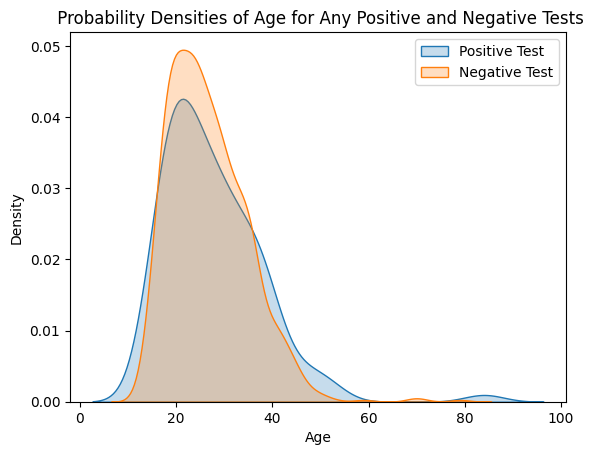

In [ ]:
# data preparation
df_positive_test = df[df["num_positive_test"] > 0]
df_negative_test = df[df["num_positive_test"] == 0]

# Age cateogry distribution
age_counts_positive = df_positive_test["age_category"].value_counts().sort_index()
age_counts_negative = df_negative_test["age_category"].value_counts().sort_index()
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=("Any positive test", "All negative tests"),
    specs=[[{"type": "domain"}, {"type": "domain"}]],
)
fig.add_trace(
    go.Pie(labels=age_counts_positive.index, values=age_counts_positive.values),
    row=1,
    col=1,
)
fig.add_trace(
    go.Pie(labels=age_counts_negative.index, values=age_counts_negative.values),
    row=1,
    col=2,
)
fig.update_layout(title_text=" Age Categories in any test groups")
fig.show()

# Age distribution
sns.kdeplot(df_positive_test["Age"], label="Any Positive Test", shade=True)
sns.kdeplot(df_negative_test["Age"], label="Negative Test", shade=True)
plt.title(" Probability Densities of Age for Any Positive and Negative Tests")
plt.legend()

fig.write_html(os.path.join(VISUALIZATION_FOLDER, "age_categories_tests.html"))

From the above plots it can be seen that the mean age of the women facing the risk of cervical are between 20 and 30 in this dataset (is a young dataset)

### Plot utils:

In [101]:
def apply_mask_uptriangle(corr):
    """
    Applies an upper triangle mask to a correlation matrix `corr`.

    This function modifies the input correlation matrix `corr` in-place, setting the values in the upper 
    triangle of the matrix (including the main diagonal) to None. 

    Args:
        corr (DataFrame): A correlation matrix where the masking is to be applied.

    Note:
        The function does not return a value as the operation is performed in-place on the input matrix.
    """
    for i in range(corr.shape[0]):
        for j in range(i, corr.shape[0]):
            corr.values[i, j] = None

### Cervical cancer correlation with risk factors

In [102]:
num_features = 6

cols_to_drop = (
    [
        "age_category",  # , #  Is not numeric
        "Dx",
        "IUD (years)",  # Repeated with IUD
        "Hormonal Contraceptives (years)",  # Repeated with smokes
        "Smokes (years)",
        "STDs: Number of diagnosis",
        "STDs (number)",
        "STDs",
    ]
    + list(std_cols)
    + list(test_cols)
)

df_excluded = df.drop(columns=cols_to_drop)

# Find the most important features
corr = df_excluded.corr()

corr_to_study = "num_positive_test"
cancer_corr = corr[corr_to_study]
top_features = cancer_corr.sort_values(ascending=False).index[0 : num_features + 1]
top_corr = df[top_features].corr()

# Plot correlation
labels = list(top_corr.columns)
apply_mask_uptriangle(top_corr)

fig = ff.create_annotated_heatmap(z=top_corr.values.round(2), x=labels, y=labels)

fig.update_layout(
    title=f"Correlation Matrix: Any positive test vs {num_features} most important features",
    width=900,
    height=900,
    title_x=0.5,
)
fig.show()
print("Tpo features are:", top_features)

fig.write_html(os.path.join(VISUALIZATION_FOLDER, "any_positive_correlation.html"))

Tpo features are: Index(['num_positive_test', 'Dx:Cancer', 'Dx:HPV', 'any_std', 'IUD', 'Age',
       'Num of pregnancies'],
      dtype='object')


### Takes:
**Moderate correlation between `Dx:Cancer` and `Dx:HPV`:** 

- Human papillomavirus (HPV) is a viral infection that's passed between people through skin-to-skin contact. It has several types, and some of them have been found to cause cancer, including cervical cancer. A strong correlation in your dataset would suggest that individuals with HPV are more likely to have cancer. This is in line with real-world data, as persistent infections with certain types of HPV can lead to cell changes that, if not treated, may become cancerous.


**Slight correlation with other variables:**
- Having a different Cancer: It's possible for one patient to have different types of cancer. The presence of one type may indicate a higher likelihood for another, due to common risk factors or genetic predispositions.
- Any STD: Sexually transmitted diseases (STDs) could indicate a riskier sexual behavior, such as unprotected sex, which is a risk factor for HPV infection, linked to cervical cancer.
- IUD: Intrauterine devices (IUDs) are often used for birth control. Some studies suggest a slight increase in the risk of cervical cancer with long-term usage of IUDs, but the correlation is still under debate in scientific research.
HPV: As noted earlier, HPV can lead to cervical cancer, explaining why a positive test for any of these would moderately correlate with HPV

### Correlation between diseases 

In [103]:
df_tests = df[["Dx:Cancer", "Dx:CIN", "Dx:HPV", "num_positive_test"]]

tests_corr = df_tests.corr()
labels = list(tests_corr.columns)

apply_mask_uptriangle(tests_corr)
fig = ff.create_annotated_heatmap(z=tests_corr.values.round(2), x=labels, y=labels)

fig.update_layout(
    title=f"Correlation Matrix: Dx: Disease vs tests", width=900, height=900, title_x=0.5
)
fig.show()
fig.write_html(os.path.join(VISUALIZATION_FOLDER, "disease_correlation.html"))

### Takes

- There is a weak correlation between `Dx:CIN` and other diseases. This is counterintuitive against HPV infection; sometimes, it may lead to cancer if it is not treated properly
- There is strong correlation between `Dx:Cancer` and `Dx:HPV`. Since we don't have information about the Cancer there is no way to know if it is related to HPV or not.

### Correlation between tests

In [104]:
df_tests = df[list(test_cols)]

tests_corr = df_tests.corr()
labels = list(tests_corr.columns)

apply_mask_uptriangle(tests_corr)
fig = ff.create_annotated_heatmap(z=tests_corr.values.round(2), x=labels, y=labels)

fig.update_layout(
    title=f"Correlation Matrix: Between tests", width=900, height=900, title_x=0.5
)
fig.show()
fig.write_html(os.path.join(VISUALIZATION_FOLDER, "tests_correlation.html"))

### Takes:
- Biopsy & Schiller (0.733204): There is a strong positive correlation between the Biopsy and Schiller tests. This means that when a positive result is received for the Schiller test, there is a high likelihood that the Biopsy test will also be positive, and vice versa.

- Biopsy & Citology (0.327466), and Schiller & Citology (0.361486): The Citology test has a moderate positive correlation with both the Biopsy and Schiller tests. This suggests that a positive result in the Citology test is somewhat likely to coincide with a positive result in either the Biopsy or the Schiller test.

- Biopsy & Hinselmann (0.547417), and Schiller & Hinselmann (0.650249): These pairs show a strong positive correlation. A positive result in the Biopsy is likely to indicate a positive Hinselmann test, and a similar relationship exists between the Schiller and Hinselmann tests.

- Citology & Hinselmann (0.192467): This pair has a weak positive correlation, meaning a positive Citology test does not significantly indicate a likelihood of a positive Hinselmann test.

## Risk factors in years logits (log odds) analysis

In [105]:
predictors = df[["Smokes (years)", "Hormonal Contraceptives (years)", "IUD (years)"]]

fig = make_subplots(rows=1, cols=1)

# Loop over test columns
for test in list(test_cols):
    model = sm.Logit(df[test], predictors)
    result = model.fit()
    coef_df = pd.DataFrame({"coef": np.exp(np.abs(result.params)), "err": result.bse})

    fig.add_trace(
        go.Bar(
            name="Coefficients test: " + test,
            x=coef_df.index,
            y=coef_df["coef"],
            error_y=dict(type="data", array=coef_df["err"]),
        ),
        row=1,
        col=1,
    )

# Update layout
fig.update_layout(
    title_text="Predictors effect on Log Odds of having a positive test",
    yaxis_title="Log Odds",
    xaxis_title="Predictors",
)

fig.write_html(os.path.join(VISUALIZATION_FOLDER, "risk_factor_log_odds.html"))
fig.show()

Optimization terminated successfully.
         Current function value: 0.517760
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.497609
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.556354
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.590536
         Iterations 7


### Takes
- In the context of predicting a positive test for cervical cancer with any test, each additional year of using an `Hormnoal contraceptives` it seems to be larger than `IUD` and `smokes` respectively.

### Correlation with hormonal contraceptives 


In [106]:
df_positive_and_contraceptive = df[
    (df["num_positive_test"] > 0) & (df["Hormonal Contraceptives (years)"] > 0)
]
df_positive_and_iud = df[(df["num_positive_test"] > 0) & (df["IUD (years)"] > 0)]

df_negative_and_contraceptive = df[
    (df["num_positive_test"] == 0) & (df["Hormonal Contraceptives (years)"] > 0)
]
df_negative_and_iud_0 = df[(df["num_positive_test"] == 0) & (df["IUD (years)"] > 0)]


# Creating subplot structure
fig = make_subplots(rows=1, cols=2)

# Defining histograms using go.Histogram
hist1 = go.Histogram(
    x=df_positive_and_contraceptive["Hormonal Contraceptives (years)"],
    nbinsx=20,
    name="Years of Hormonal Contraceptive any positive test",
    opacity=0.75,
    histnorm="probability",
)  # Normalize histogram)
hist2 = go.Histogram(
    x=df_positive_and_iud["IUD (years)"],
    nbinsx=20,
    name="Years of IUD any positive test",
    opacity=0.75,
    histnorm="probability",
)

hist3 = go.Histogram(
    x=df_negative_and_contraceptive["Hormonal Contraceptives (years)"],
    nbinsx=20,
    name="Years of Hormonal Contraceptive Use negative tests",
    opacity=0.75,
    histnorm="probability",
)
hist4 = go.Histogram(
    x=df_negative_and_iud_0["IUD (years)"],
    nbinsx=20,
    name="Years of IUD Use negative tests",
    opacity=0.75,
    histnorm="probability",
)

# Adding histograms to subplots
fig.add_trace(hist1, row=1, col=1)
fig.add_trace(hist2, row=1, col=2)
fig.add_trace(hist3, row=1, col=1)
fig.add_trace(hist4, row=1, col=2)

# Updating layout
fig.update_layout(
    bargap=0.1,
    title_text="Distribution of Years of Hormonal Contraceptive and IUD Use",
    xaxis_title="Years",
    yaxis_title="Probability ",
    bargroupgap=0.1,
)

fig.show()
fig.write_html(os.path.join(VISUALIZATION_FOLDER, "hormonal_iud.html"))

### Info:
Women who have used oral contraceptives for 5 or more years have a higher risk of cervical cancer than women who have never used oral contraceptives. The longer a woman uses oral contraceptives, the greater the increase in her risk of cervical cancer. One study found a 10% increased risk for less than 5 years of use, a 60% increased risk with 5–9 years of use, and a doubling of the risk with 10 or more years of use. However, the risk of cervical cancer has been found to decline over time after women stop using oral contraceptives. Extracted form [https://www.cancer.gov/about-cancer/causes-prevention/risk/hormones/oral-contraceptives-fact-sheet#q6](https://www.cancer.gov/about-cancer/causes-prevention/risk/hormones/oral-contraceptives-fact-sheet#q6)

### Takes
- The small peaks at the age of 8 and 14 shows even higher risk than women who have not used the contraceptives.
- There is a difference about the use of IUD between the two classes. Womans with any positive had use IUD more than 5 years. 
- The usage of hormaonal contraceptives is larger in number of womans than the usage of IUDs for the cost

## 


## Number of pregnancies:

In [107]:
def plot_box(col_name: str):
    fig = make_subplots(
        rows=2,
        cols=2,
        subplot_titles=(
            "Any Positive Test - Histogram",
            "Any Positive Test - Boxplot",
            "Negative Tests - Histogram",
            "Negative Test - Boxplot",
        ),
        shared_xaxes=True,
    )

    # Create a separate normalized histogram and box plot for cancer cases
    trace0_hist = go.Histogram(
        x=df_positive_test[col_name],
        histnorm="probability",  # Normalize histogram
        name="Any positive test",
    )
    fig.add_trace(trace0_hist, row=1, col=1)

    trace0_box = go.Box(x=df_positive_test[col_name], name="Any positive test")
    fig.add_trace(trace0_box, row=1, col=2)

    # Create a separate normalized histogram and box plot for non-cancer cases
    trace1_hist = go.Histogram(
        x=df_negative_test[col_name],
        histnorm="probability",  # Normalize histogram
        name="Negative test",
    )
    fig.add_trace(trace1_hist, row=2, col=1)

    trace1_box = go.Box(x=df_negative_test[col_name], name="Negative test")
    fig.add_trace(trace1_box, row=2, col=2)

    fig.update_layout(height=600, width=900, title_text=f"{col_name} Distribution")
    fig.update_yaxes(title_text="Normalized Counts", row=1, col=1)
    fig.update_yaxes(title_text="Counts", row=1, col=2)
    fig.update_yaxes(title_text="Normalized Counts", row=2, col=1)
    fig.update_yaxes(title_text="Counts", row=2, col=2)

    return fig


fig = plot_box("Num of pregnancies")
fig.show()
fig.write_html(os.path.join(VISUALIZATION_FOLDER, "pregnancies.html"))

### Takes
- There is no a difference between number of number of pregnancies in this dataset. In the literature it is said that the number of pregnancies is a risk factor for cervical cancer.  

## Number of sexual partners and First sexual intercourse

In [108]:
def plot_gaussian_kde_per_test(col: str, x_range: tuple):
    fig = make_subplots(
        rows=2, cols=2, subplot_titles=["Hinselmann", "Biopsy", "Schiller", "Citology"]
    )

    datasets = [
        (df_positive_hinselmann, df_negative_hinselmann),
        (df_positive_biopsy, df_negative_biopsy),
        (df_positive_schiller, df_negative_schiller),
        (df_positive_citology, df_negative_citology),
    ]

    positions = [(1, 1), (1, 2), (2, 1), (2, 2)]

    for data, pos in zip(datasets, positions):
        positive_data, negative_data = data
        positive_kde = gaussian_kde(positive_data[col])
        negative_kde = gaussian_kde(negative_data[col])

        x = np.linspace(x_range[0], x_range[1], 1000)

        fig.add_trace(
            go.Scatter(
                x=x, y=positive_kde(x), name="Positive Test", line=dict(color="orange")
            ),
            row=pos[0],
            col=pos[1],
        )

        fig.add_trace(
            go.Scatter(
                x=x, y=negative_kde(x), name="Negative Test", line=dict(color="violet")
            ),
            row=pos[0],
            col=pos[1],
        )

    fig.update_layout(showlegend=True, title="Distribution of {} per test".format(col))
    return fig


fig_first_sexual = plot_gaussian_kde_per_test("First sexual intercourse", (10, 30))
fig_first_sexual.show()

fig_num_sexual_partners = plot_gaussian_kde_per_test(
    "Number of sexual partners", (0, 8)
)
fig_num_sexual_partners.show()

fig.write_html(os.path.join(VISUALIZATION_FOLDER, "sexual_activity.html"))

### Takes
 - The first density plot suggest a higher risk for women who began being sexually active from age 15 to 20. To back up this claim, you can check out the resources provided here: https://www.mayoclinic.org/diseases-conditions/cervical-cancer/symptoms-causes/syc-20352501. Therefore, this could also be seen as a critical factor in detecting cervical cancer.
 - The density plot that the mean number of sexual partners may be an important factor in detecting cervical cancer as it is a sexually transmitted disease. 

## 

## Sexual transmission disease 

In [109]:
colors = px.colors.qualitative.Plotly[: len(list(std_cols))]

color_dict = {std: color for std, color in zip(list(std_cols), colors)}

missing = [std for std in std_cols if std not in color_dict.keys()]
missing_colors = ["blue", "gray", "black"]

for i, key in enumerate(missing):
    color_dict[key] = missing_colors[
        i
    ]  # you can replace 'grey' with any valid color of your choice


fig = make_subplots(
    rows=1, cols=2, subplot_titles=("Cases any positive test", "Cases negative tests")
)

df_positive_test[list(std_cols)] = df_positive_test[list(std_cols)].astype('int')
df_negative_test[list(std_cols)] = df_negative_test[list(std_cols)].astype('int')

stds_per_age_cat_cancer = df_positive_test.groupby("age_category")[list(std_cols)].sum()
stds_per_age_cat_no_cancer = df_negative_test.groupby("age_category")[list(std_cols)].sum()

for col in std_cols:
    fig.add_trace(
        go.Bar(
            name=col,
            x=stds_per_age_cat_cancer.index,
            y=stds_per_age_cat_cancer[col],
            marker_color=color_dict[col],
        ),
        row=1,
        col=1,
    )
    fig.add_trace(
        go.Bar(
            name=col,
            x=stds_per_age_cat_no_cancer.index,
            y=stds_per_age_cat_no_cancer[col],
            marker_color=color_dict[col],
        ),
        row=1,
        col=2,
    )

fig.update_layout(barmode="stack")
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_xaxes(title_text="Age Category")
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.show()

fig.write_html(os.path.join(VISUALIZATION_FOLDER, "STDs.html"))

### Takes:

- In this dataset the most common STD for those who have been diagnosed with any test positive for cervical cancer are: 

    - STDs condylomatosis, 
    - STDs: HIV
    - STDs: Vulvo Pernial Condylomatosis.

- It is worth noting that HPV is not in this variables via the variables `Dx:HPV`. 

### Correlation with smoking

In [110]:
# Filtering DataFrame based on conditions
df_positive_and_smoking_years = df[
    (df["num_positive_test"] > 1) & (df["Smokes (years)"] > 0)
]
df_negative_and_smoking_years = df[
    (df["num_positive_test"] == 0) & (df["Smokes (years)"] > 0)
]

histonorm = None
histonorm = "probability"

hist1 = go.Histogram(
    x=df_positive_and_smoking_years["Smokes (years)"],
    nbinsx=20,
    name="Years of Smokes any positive test",
    histnorm=histonorm,
    cumulative_enabled=True,
)

hist2 = go.Histogram(
    x=df_negative_and_smoking_years["Smokes (years)"],
    nbinsx=20,
    name="Years of Smokes negative tests",
    histnorm=histonorm,
    cumulative_enabled=True,
)

hist3 = go.Histogram(
    x=df_positive_and_smoking_years["Smokes (packs/year)"],
    nbinsx=20,
    name="Packs/year any positive test",
    histnorm=histonorm,
    cumulative_enabled=True,
)

hist4 = go.Histogram(
    x=df_negative_and_smoking_years["Smokes (packs/year)"],
    nbinsx=20,
    name="Packs/year negative tests",
    histnorm=histonorm,
    cumulative_enabled=True,
)
fig = make_subplots(rows=1, cols=2)

# # # Adding histograms to subplots
fig.add_trace(hist1, row=1, col=1)
fig.add_trace(hist2, row=1, col=1)
fig.add_trace(hist3, row=1, col=2)
fig.add_trace(hist4, row=1, col=2)

# # # Updating layout
fig.update_layout(
    bargap=0.1,
    title_text="Distribution of Smoking ECDF (years)",
    xaxis_title="Years",
    yaxis_title="probability",
    bargroupgap=0.1,
)

fig.write_html(os.path.join(VISUALIZATION_FOLDER, "smoking.html"))

### Takes
- **In accordance to the previous results smoking doesn't makes a big difference between any positive and negative cases.** There is a slighly difference in first years of smoking, but it is not significant.

### PCA

Let's perform a PCA on the data to see if we can reduce the dimensionality of the data to deploy more efficient machine learning models, this is based on Principal Component Analysis, this is a lienar transformation that changes vairances by projecting onto the direction that varies the most. It can't capture complex patterns in higher dimensions but can lose some information. 
- The input is scaled with Standard Scaler to avoid biasing the PCA towards features with higher variances and values.

¿ How many components to see how many components are needed to explain a certain amount of variance ? We perform a PCA with 99% components and plot the cumulative sum of explained variance ratio.

In [111]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop(["num_positive_test"] + list(test_cols), axis=1)
X_transformed = StandardScaler().fit_transform(X)

pca = PCA(n_components=0.99)
pca.fit_transform(X_transformed)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

fig = make_subplots(rows=2, cols=1)
fig.add_trace(
    go.Scatter(
        x=list(range(1, len(explained_variance) + 1)),
        y=cumulative_explained_variance,
        mode="lines+markers",
        name="cumulative explained variance",
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=list(range(1, len(explained_variance) + 1)),
        y=explained_variance,
        mode="lines+markers",
        name="Individual explained variance",
    ),
    row=2,
    col=1,
)

# Add titles and labels
fig.update_yaxes(title_text="Cumulative explained variance", row=1, col=1)
fig.update_yaxes(title_text="Individual explained variance", row=2, col=1)
fig.update_xaxes(title_text="Principal components", row=1, col=1)
fig.update_xaxes(title_text="Principal components", row=2, col=1)
fig.update_layout(height=600, width=800, title_text="Principal Component Analysis")

fig.write_html(os.path.join(VISUALIZATION_FOLDER, "pca.html"))
fig.show()

### Takes 
- With 18- 19 components we get 95% of the variance. This can be used to reduce the dimensionality of the data. Disclaimer: this can be affected if oversampling techniques are used.

## Part 3 - Balance the dataset

To balance a dataset we have the following techniques oversampling techniques:
- SMOTE (Synthetic Minority Over-sampling Technique): SMOTE is an oversampling method that creates synthetic examples rather than creating exact replicas of instances. It selects observations that are close in the feature space, drawing a line between the observations in the feature space and drawing a new sample at a point along that line. 
- ADASYN (Adaptive Synthetic Sampling): ADASYN also creates synthetic examples for the minority class. Unlike SMOTE which generates the same number of synthetic samples for each original minority instance, ADASYN uses a density distribution as a criterion to automatically decide the number of synthetic samples to be generated for each minority sample. 

| Method | Strengths | Weaknesses |
|--------|-----------|------------|
| **SMOTE** | <ul><li>Creates synthetic samples rather than duplicating existing ones, mitigating overfitting.</li><li>Better learning performance as it forces the classifier to be more general.</li></ul> | <ul><li>Purely synthetic samples can introduce noise.</li><li>Doesn't consider the underlying distribution of the minority class, which can lead to over-generalization.</li><li>Doesn't take into account the neighboring examples from the majority class, potentially causing class overlap.</li></ul> |
| **ADASYN** | <ul><li>Adapts the sampling strategy dynamically, it focuses on examples that are difficult to learn (those located in the decision boundary).</li><li>Creates synthetic data based on the data distribution: more samples from sparser regions.</li></ul> | <ul><li>More computationally expensive than SMOTE as it needs to compute the K-nearest neighbors for each instance in the minority class.</li><li>May produce outliers if the minority class instances are already noisy.</li><li>Same as SMOTE, potential introduction of synthetic distant instances can lead to over-generalization.</li></ul> |

If we don't use oversamlping, the model will be biased towards the majority class. And obtain performances like this (for instance if we use stratified sampling to keep the same probability distribution):
```
   precision    recall  f1-score   support

0       0.93      1.00      0.97       560
1       0.00      0.00      0.00        40
```


Based on [ [1]() ] and the analysis SMOTE is then used. Thereby can be improved the model's ability to generalize, without causing overfitting which is common when simply duplicating instances.

In [112]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Create the training and test sets
X = df.drop(["num_positive_test"] + list(test_cols), axis=1)
y = df["num_positive_test"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Apply SMOTEENN
sm = SMOTEENN(random_state=10, smote=SMOTE(sampling_strategy="auto", k_neighbors=4))
X_res, y_res = sm.fit_resample(X_train, y_train)

counter_before = Counter(y)
counter_after = Counter(y_res)

trace1 = go.Bar(
    x=list(counter_before.keys()),
    y=list(counter_before.values()),
    name="Before SMOTEENN",
)
trace2 = go.Bar(
    x=list(counter_after.keys()), y=list(counter_after.values()), name="After SMOTEENN"
)
fig = make_subplots(rows=2, cols=1)
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)
fig.update_layout(
    height=600, width=700, title_text="Class Distribution: Before and After SMOTEENN"
)
fig.show()

### Binary Logistic regression model with feature selection

The first model to implement is just a linear regression model with selected features and to predict a cancer risk value between 0 and 4. This model can be usefull to debug and see the effects of new features. This model will have the following characteristics:

**Inputs**:
- `Age(int)` 
- `any_std(bool)`
- `Smokes(years) (float)`
- `Number of pregnancies (int)`
- `IUD(years)`
- `First sexual intercourse (int)`
- `Num of sexual partners (int)`
- `Dx: Cancer (bool)`
- `Dx: HPV (bool)`
- `Dx: CIN (bool)`

**Output**:
- `any_positive_test(bool)`

In [113]:
df[list(test_cols)].info()
df[list(test_cols)] = df[list(test_cols)].astype(bool)
df["Any_positive_test"] = df[list(test_cols)].any(axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Citology    858 non-null    int64
 1   Hinselmann  858 non-null    int64
 2   Biopsy      858 non-null    int64
 3   Schiller    858 non-null    int64
dtypes: int64(4)
memory usage: 26.9 KB


In [114]:
import os
import numpy as np
import pandas as pd

# Pre processing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# Model
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import classification_report

# Load dataset from skratch to avoid bugs
df = pd.read_csv(os.path.join("data", "kag_risk_factors_cervical_cancer.csv"))
df = pre_process(df)

# findall Nan 
# Add features
df["Any_std"] = df[list(std_cols)].any(axis=1)
df[list(test_cols)] = df[list(test_cols)].astype(bool)
df["Any_positive_test"] = df[list(test_cols)].any(axis=1)

# Model selected features and target
features = [
    "Age",
    "Smokes (years)",
    "Hormonal Contraceptives (years)",
    "IUD (years)",
    "STDs (number)",
    "Number of sexual partners",
    "Dx:Cancer",
    "Dx:HPV",
    "Dx",
    "Any_std",
]

target = ["Any_positive_test"]

# Split the data
X = df[features]
y = df[target].values.ravel()

# Split the data into training and test sets
random_state = 0  # reproducible results
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=random_state
)

# Oversampling
sm = SMOTEENN(
    random_state=random_state, smote=SMOTE(sampling_strategy="auto")
)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Scale the data
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)
X_test = scaler.transform(X_test)

# Define the model
model = LogisticRegression(random_state=random_state)

# Train and predict
model.fit(X_res, y_res)
y_train_pred = model.predict(X_res)
y_pred = model.predict(X_test)

# Evaluate the model
train_report = classification_report(y_res, y_train_pred)
test_report = classification_report(y_test, y_pred)
print("Train report:")
print(train_report)
print("Test report:")
print(test_report)

# Extract the weights to understand the importance of each feature
weights = model.coef_
coef_df = pd.DataFrame({"features": X.columns, "weights": weights.ravel()})
coef_df = coef_df.sort_values(by="weights", ascending=False).reset_index(drop=True)

fig = go.Figure(
    go.Bar(
        x=coef_df["weights"],
        y=coef_df["features"],
        orientation="h",  # Horizontal orientation
    )
)

fig.update_layout(
    title="Feature Weights Logistic Regression",
    xaxis=dict(
        title="Weights",
        zeroline=True,  # Add a line at x=0
        zerolinecolor="gray",  # Make the line gray
    ),
    yaxis=dict(autorange="reversed"),  # Reverse the order of y-axis
    width=1000,
    height=500,
    autosize=False,
)

fig.show()
fig.write_html(os.path.join(VISUALIZATION_FOLDER, "logistic_model.html"))

Train report:
              precision    recall  f1-score   support

       False       0.59      0.65      0.61       293
        True       0.69      0.63      0.66       362

    accuracy                           0.64       655
   macro avg       0.64      0.64      0.64       655
weighted avg       0.64      0.64      0.64       655

Test report:
              precision    recall  f1-score   support

       False       0.91      0.62      0.74       231
        True       0.13      0.48      0.20        27

    accuracy                           0.61       258
   macro avg       0.52      0.55      0.47       258
weighted avg       0.83      0.61      0.68       258



The model is a very simple `LogisticRegression` model ant the problem is nonlinear. However we can gain some insights. It presents high bias and is not good at predicting the positive class.


## Takes
- Features like `Any_std`, `Hormonal Contraceptives (years)`, and `Smokes (years)` increase the likelihood of a positive cervical cancer test. (Intuitively, this makes sense.)
-  `Dx:Cancer`, `Dx`, and `Dx:HPV` slightly raise the chance of a positive test.
- More counts of  `STDs (number)` decrease the risk of a positive cervical cancer test. This is counterintuitive and may be due to the that not all STDs are equally likely to cause cervical cancer. Same behavior can be found in `Number of sexual partners`

### Model 1: Assembled models with a PCA pipeline

Let's now move on to a more complex model. We will use a PCA pipeline to reduce the dimensionality of the data and then use a logistic regression and assembled models to predict the target variable. 

**Inputs**:
- All the dataset except target variables and features with high uncertainty

**Output**:
- `risk(int) ` - 0,1,2,3,4 

The optimized parameters were extracted form [ [1]() ] (see `REPORT.md`) and hyperparameters for a `RandomForest` were optimized using a GridSearch strategy. Since this a multiclass problem we can use our own score as target during the grid search optimization process. We are going to add more weight to higher cancer risk

In [115]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from typing import List

class_weights = {0: 1, 1: 2, 2: 3, 3:4, 4:5}  # example class weights


def custom_f1_score(y_true: List[int], y_pred: List[int]) -> float:
    """
    Custom scoring function to calculate the F1 score with a twist.
    This function gives more importance to certain classes over others.
    The weights for classes should be defined in the 'class_weights' dictionary.
    
    Arguments:
    y_true -- List of true class labels
    y_pred -- List of predicted class labels

    Returns:
    weighted_score -- Weighted F1 Score 
    """
    score = f1_score(y_true, y_pred, average=None)
    weighted_score = 0.0
    for i in range(len(score)):
        weighted_score += score[i]*class_weights[i]
    return weighted_score

custom_scorer = make_scorer(custom_f1_score, greater_is_better=True)

Features: ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx']
--- Logistic Regression ---
Train report:
              precision    recall  f1-score   support

           0       0.63      0.24      0.35       176
           1       0.41      0.48      0.44       488
           2       0.48      0.46      0.47       495
           3       0.55      0.48      0.51       441
           4       0.64      0.78      0.70       525

    accuracy        

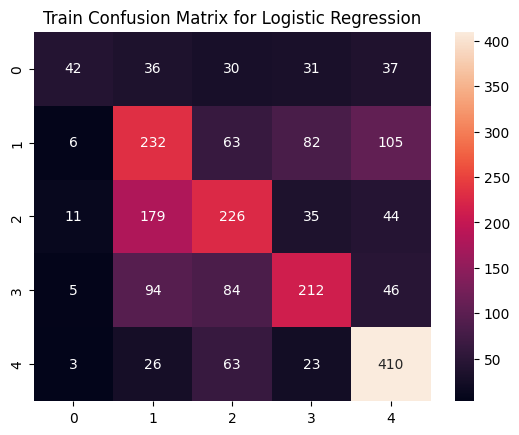

Test confusion matrix:


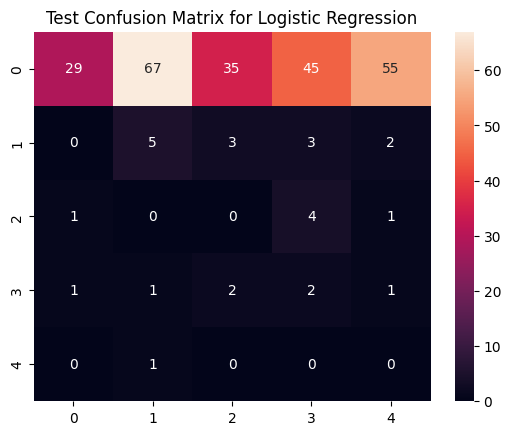

--- Random Forest ---
Train report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       176
           1       1.00      1.00      1.00       488
           2       0.99      1.00      0.99       495
           3       0.99      0.99      0.99       441
           4       1.00      1.00      1.00       525

    accuracy                           0.99      2125
   macro avg       0.99      0.99      0.99      2125
weighted avg       0.99      0.99      0.99      2125

Test report:
              precision    recall  f1-score   support

           0       0.94      0.41      0.57       231
           1       0.07      0.31      0.12        13
           2       0.03      0.17      0.06         6
           3       0.07      0.57      0.13         7
           4       0.00      0.00      0.00         1

    accuracy                           0.40       258
   macro avg       0.22      0.29      0.18       258
weighted avg       0.85     

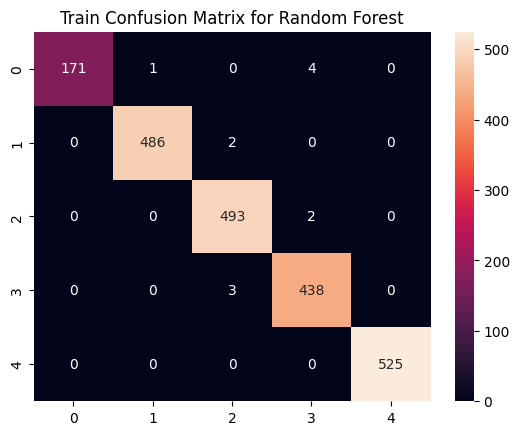

Test confusion matrix:


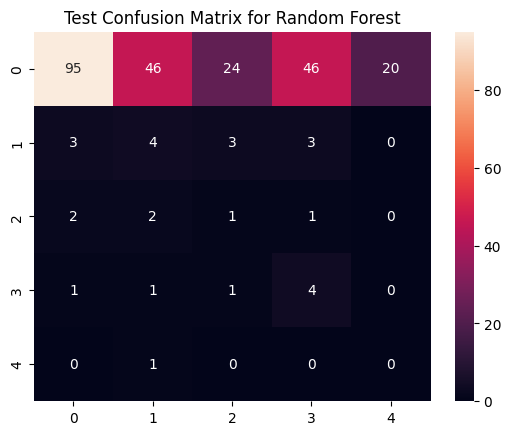

--- AdaBoost ---
Train report:
              precision    recall  f1-score   support

           0       0.56      0.39      0.46       176
           1       0.59      0.68      0.64       488
           2       0.51      0.71      0.59       495
           3       0.78      0.43      0.56       441
           4       0.94      0.92      0.93       525

    accuracy                           0.67      2125
   macro avg       0.68      0.63      0.64      2125
weighted avg       0.70      0.67      0.67      2125

Test report:
              precision    recall  f1-score   support

           0       0.94      0.29      0.44       231
           1       0.07      0.38      0.12        13
           2       0.02      0.17      0.04         6
           3       0.03      0.14      0.05         7
           4       0.00      0.00      0.00         1

    accuracy                           0.29       258
   macro avg       0.21      0.20      0.13       258
weighted avg       0.85      0.29

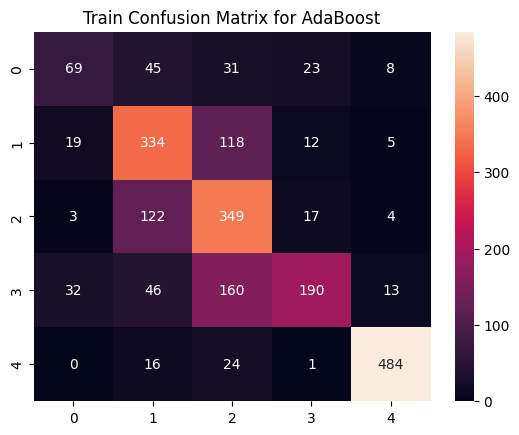

Test confusion matrix:


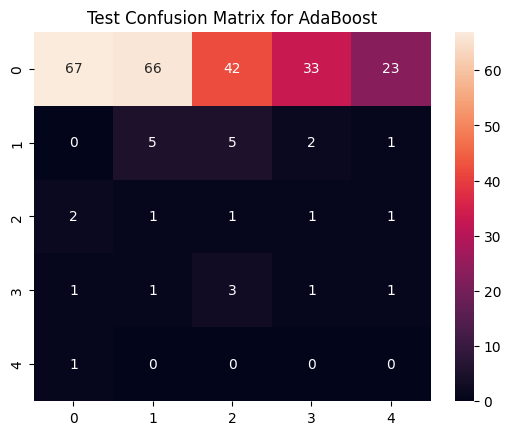

--- XGBoost ---
Train report:
              precision    recall  f1-score   support

           0       0.90      0.41      0.57       176
           1       0.79      0.80      0.79       488
           2       0.85      0.80      0.82       495
           3       0.78      0.83      0.80       441
           4       0.86      0.99      0.92       525

    accuracy                           0.82      2125
   macro avg       0.83      0.77      0.78      2125
weighted avg       0.83      0.82      0.82      2125

Test report:
              precision    recall  f1-score   support

           0       0.95      0.16      0.27       231
           1       0.06      0.31      0.10        13
           2       0.03      0.17      0.04         6
           3       0.03      0.29      0.06         7
           4       0.00      0.00      0.00         1

    accuracy                           0.17       258
   macro avg       0.21      0.18      0.09       258
weighted avg       0.85      0.17 

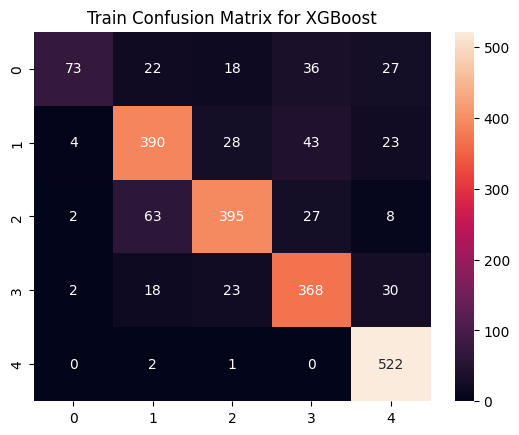

Test confusion matrix:


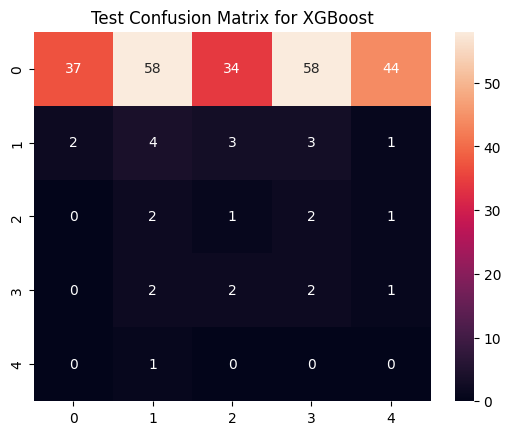

In [116]:
import os
import numpy as np
import pandas as pd

# Pre processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Load dataset from skratch to avoid bugs
df = pd.read_csv(os.path.join("data", "kag_risk_factors_cervical_cancer.csv"))
df = pre_process(df)

# Model features
features = df.columns.tolist()
for col in ["Hinselmann", "Schiller", "Citology", "Biopsy"]:
    features.remove(col)
print("Features:", features)

# Target features
target = "Risk_factor"
df[target] = df[list(test_cols)].sum(axis=1)

# Split the data
X = df[features]
y = df[target]

# Split the data into training and test sets
random_state = 0  # reproducible results
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=random_state
)

# Oversampling
sm = SMOTEENN(
    random_state=random_state, smote=SMOTE(sampling_strategy="auto", k_neighbors=4)
)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Input scaling
scaler = StandardScaler()


"""Modelling"""
# Define a list of models
models = [
    {
        "name": "Logistic Regression",
        "model": LogisticRegression(C=0.1, random_state=random_state),
    },
    {
    "name": "Random Forest",
    "model": RandomForestClassifier(
        random_state=random_state),
    },
    {
        "name": "AdaBoost",
        "model": AdaBoostClassifier(
            n_estimators=600,
            learning_rate=0.1,
            estimator=None,
            random_state=random_state,
        ),
    },
    {
        "name": "XGBoost",
        "model": XGBClassifier(
            booster="gbtree",
            random_state=random_state,
            nthread=8,
            learning_rate=0.05,
            gamma=0.1,
            max_depth=2,
        ),
    },
]


# Hyperparameter Tuning
parameters = {'Random Forest':{'n_estimators':[100,200,300,400,500],'max_depth':[3,5,7,9,11], 'min_samples_split':[2,3,4,5]}}

# Cross validation 
cross_validation_fold = 3

# Set up PCA for dimensionality reduction, maintain 95% of variance
pca = PCA(n_components=20)

for m in models:

    if m['name'] == 'Random Forest':
        pipeline = Pipeline(
            steps=[ 
                ("s", scaler),
                ("pca", pca), 
                ("m", GridSearchCV(estimator=m['model'], param_grid=parameters[m['name']], cv = cross_validation_fold, n_jobs=2, scoring=custom_scorer)),
            ]
        )
        pipeline.fit(X_res, y_res)        # fit the pipeline with the training data
    else:
        # define the pipeline
        pipeline = Pipeline(
            steps=[("s", scaler), 
                ("pca", pca), 
                ("m", m["model"])]  
        )
        pipeline.fit(X_res, y_res)

    # Predict
    y_train_pred = pipeline.predict(X_res)
    y_pred = pipeline.predict(X_test)

    # Print classification report for train and test data
    print(f"--- {m['name']} ---")
    print("Train report:")
    print(classification_report(y_res, y_train_pred))
    print("Test report:")
    print(classification_report(y_test, y_pred))

    # Calculate and print confusion matrix for train data
    print("Train confusion matrix:")
    cm_train = confusion_matrix(y_res, y_train_pred)
    sns.heatmap(cm_train, annot=True, fmt="d")
    plt.title(f'Train Confusion Matrix for {m["name"]}')
    plt.show()

    # Calculate and print confusion matrix for test data
    print("Test confusion matrix:")
    cm_test = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_test, annot=True, fmt="d")
    plt.title(f'Test Confusion Matrix for {m["name"]}')
    plt.show()

## Takes: 
1. The **Logistic Regression** model shows signs of overfitting and underfitting, with a cross-validation accuracy of approximately 52% and a testing accuracy of approximately 9%.

2. The **Random Forest** model outperforms the Logistic Regression model, with a cross-validation accuracy of approximately 99%. However, it also shows signs of overfitting as the testing accuracy drops significantly to 36%.

3. The **AdaBoost** model performed the worst, with a cross-validation accuracy of approximately 66% and a testing accuracy of only 24%.

4. The **XGBoost** model performed similarly to the Random Forest, with a cross-validation accuracy of approximately 81% but the testing accuracy dropped to 18%.

**The models appear to be overfitting, potentially due to insufficient training data for the minor classes. One potential solution could be to train one model for each class and then ensemble them. Another possible approach could be to use K-Fold Cross Validation and increase the number of features.**

### Models 2: Assembled models with a PCA pipeline binary classification for each test

Let's now move on to a more complex model. We will use a PCA pipeline to reduce the dimensionality of the data and then assebled models with bagginh and boosting techniques. Also cross validation is used to prevent overfitting.

**Inputs**:
- `'Age`'
- `'Number of sexual partners`'
- `'First sexual intercourse`'
- `'Num of pregnancies`'
- `'Smokes`'
- `'Smokes (years)`'
- `'Smokes (packs/year)`' 
-`'Hormonal Contraceptives`'
- `'Hormonal Contraceptives (years)`'
- `'IUD`'
- `'IUD (years)`'
- `'STDs`'
- `'STDs (number)`'
- `'STDs:condylomatosis`'
- `'STDs:cervical condylomatosis`'
- `'STDs:vaginal condylomatosis`'
- `'STDs:vulvo-perineal condylomatosis`'
- `'STDs:syphilis`'
- `'STDs:pelvic inflammatory disease`'
- `'STDs:genital herpes`'
- `'STDs:molluscum contagiosum`'
-`'STDs:AIDS`'
- `'STDs:HIV`'
- `'STDs:Hepatitis B`'
- `'STDs:HPV`'
- `'STDs: Number of diagnosis`'
- `'Dx:Cancer`'
- `'Dx:CIN`'
- `'Dx:HPV`'
- `'Dx`'
- `'Age_category`'
- `'Smoke (packages)`'

**Output**:
- `Test exam (bool) ` - 0 or 1 

The optimized parameters were extracted form [1]

In [117]:
import os
import pandas as pd

# Pre processing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold

# Utils
from sklearn.metrics import classification_report

def run_model_analyses(target_test: str, test_to_remove_from_features: list = list(test_cols), add_any_pos_test: bool = False):
    # Load dataset from skratch to avoid bugs
    df = pd.read_csv(os.path.join("data", "kag_risk_factors_cervical_cancer.csv"))
    df = pre_process(df)

    # Add target feature
    df["Age_category"] = df["Age"].apply(age_cat)
    df["Smoke (packages)"] = df["Smokes (years)"] * df["Smokes (packs/year)"]

    if add_any_pos_test:
        df["Any_positive_test"] = df[list(test_cols)].any(axis=1)

    # Split the data
    y = df[target_test]

    # Remove other tests features
    features = df.columns.tolist()
    if test_to_remove_from_features is not None:
        add_any_pos_test and test_to_remove_from_features.append("Any_positive_test")
        for test in test_to_remove_from_features:
            features.remove(test)
        
    X = df[features]

    # Split the data into training and test sets
    random_state = 0  # reproducible results
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=random_state
    )

    # Oversampling
    sm = SMOTEENN(random_state=random_state, smote=SMOTE(sampling_strategy="auto"))
    X_res, y_res = sm.fit_resample(X_train, y_train)

    """Modelling"""
    # Define a list of models
    models = [
        {
            "name": "Random Forest",
            "model": RandomForestClassifier(
                n_estimators=100,
                max_features="log2",
                criterion="gini",
                max_depth=7,
                min_samples_split=5,
                min_samples_leaf=1,
                random_state=random_state,
            ),
        },
        {
            "name": "AdaBoost",
            "model": AdaBoostClassifier(
                n_estimators=600,
                learning_rate=0.1,
                estimator=None,
                random_state=random_state,
            ),
        },
        {
            "name": "XGBoost",
            "model": XGBClassifier(
                booster="gbtree",
                random_state=42,
                nthread=8,
                learning_rate=0.05,
                gamma=0.1,
                max_depth=3,
            ),
        },
                ]

    pca = PCA(n_components=20)

    pipelines = []

    # Input scaling
    scaler = StandardScaler()
    
    # Cross validation K-fold
    cross_validation_fold = 9
    kf = KFold(n_splits=cross_validation_fold, random_state=random_state, shuffle=True)

    for m in models:
        # define the pipeline
        # 1. Scaling
        # 2. PCA
        # 3.Train the model with GridSearchCV and Cross Validation
        pipeline = Pipeline(
            steps=[
                ("s", scaler),      # Scaler
                ("pca", pca),       # PCA
                ("m", m['model']),  # Model
            ]
        )

        for train_index, test_index in kf.split(X_res):
            X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
            y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]                
            pipeline.fit(X_train, y_train)

        # Predict
        y_train_pred = pipeline.predict(X_res)
        y_pred = pipeline.predict(X_test)

        # Print classification report for train and test data
        print(f"--- {m['name']} ---")
        print("Train report:")
        print(classification_report(y_res, y_train_pred))
        print("Test report:")
        print(classification_report(y_test, y_pred))


        print("Train confusion matrix:")
        cm_train = confusion_matrix(y_res, y_train_pred)
        sns.heatmap(cm_train, annot=True, fmt="d")
        plt.title(f'Train Confusion Matrix for {m["name"]}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Calculate and print confusion matrix for test data
        print("Test confusion matrix:")
        cm_test = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm_test, annot=True, fmt="d")
        plt.title(f'Test Confusion Matrix for {m["name"]}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        pipelines.append(pipeline)

    return pipelines

# Biopsy exam model 2

--- Random Forest ---
Train report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       332
           1       0.94      0.98      0.96       485

    accuracy                           0.95       817
   macro avg       0.95      0.94      0.95       817
weighted avg       0.95      0.95      0.95       817

Test report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        37
           1       0.88      0.92      0.90        53

    accuracy                           0.88        90
   macro avg       0.88      0.87      0.87        90
weighted avg       0.88      0.88      0.88        90

Train confusion matrix:


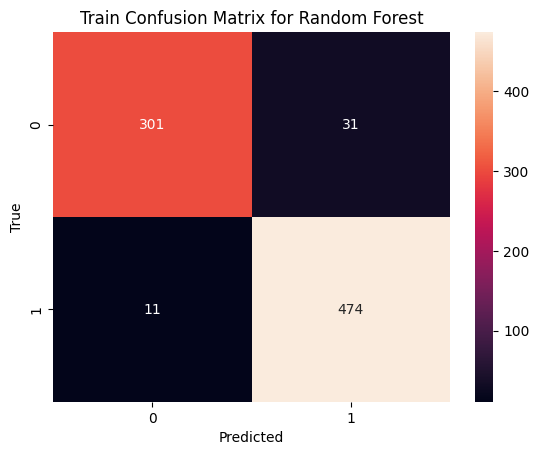

Test confusion matrix:


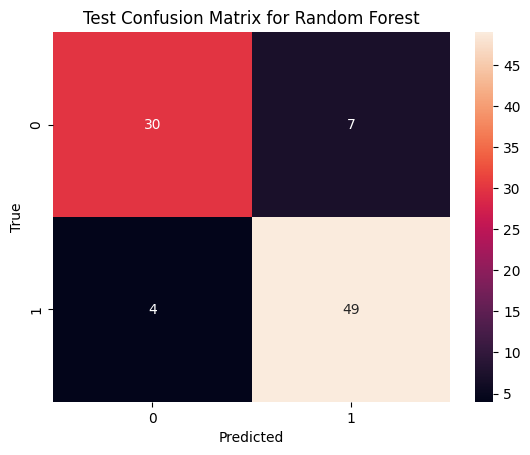

--- AdaBoost ---
Train report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       332
           1       0.91      0.96      0.93       485

    accuracy                           0.92       817
   macro avg       0.92      0.91      0.92       817
weighted avg       0.92      0.92      0.92       817

Test report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        37
           1       0.84      0.92      0.88        53

    accuracy                           0.86        90
   macro avg       0.86      0.84      0.85        90
weighted avg       0.86      0.86      0.85        90

Train confusion matrix:


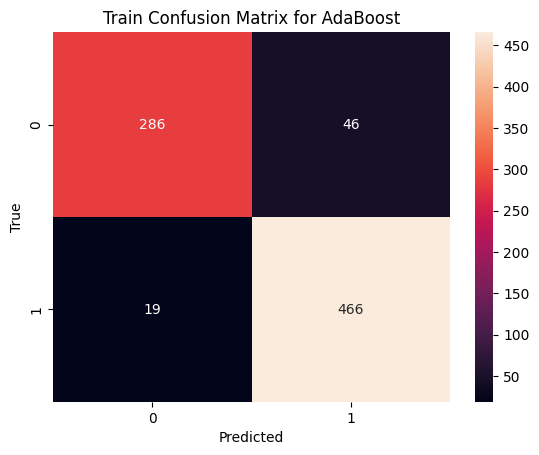

Test confusion matrix:


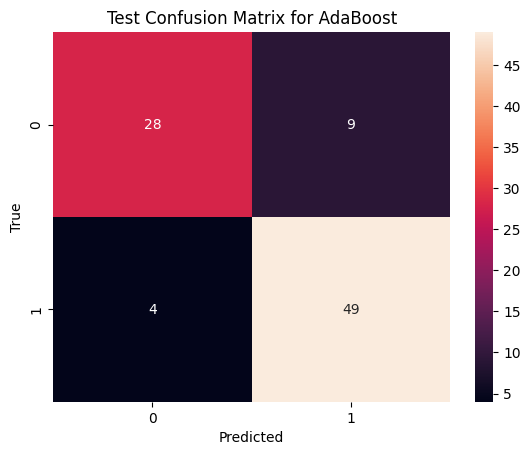

--- XGBoost ---
Train report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       332
           1       0.90      0.96      0.93       485

    accuracy                           0.91       817
   macro avg       0.92      0.90      0.91       817
weighted avg       0.91      0.91      0.91       817

Test report:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        37
           1       0.80      0.91      0.85        53

    accuracy                           0.81        90
   macro avg       0.82      0.79      0.80        90
weighted avg       0.81      0.81      0.81        90

Train confusion matrix:


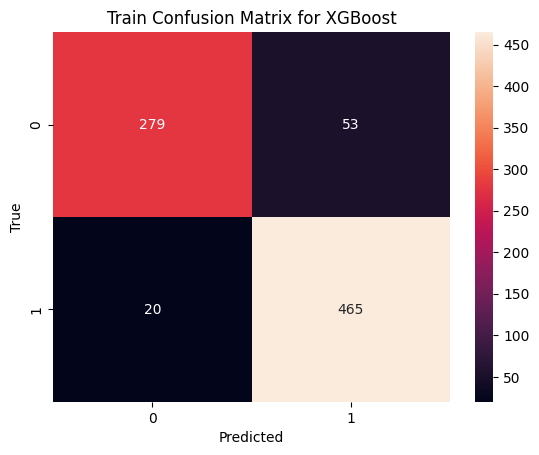

Test confusion matrix:


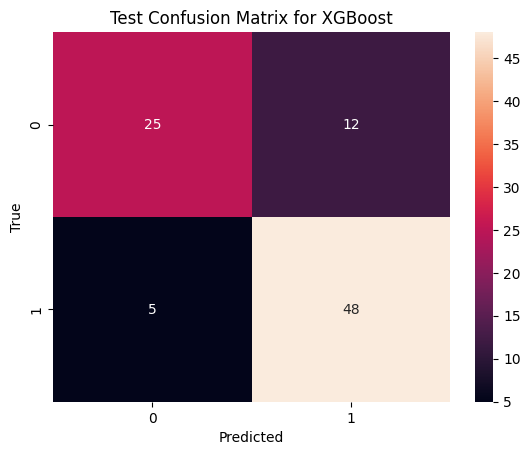

In [118]:
pipelines_Biopsy = run_model_analyses("Biopsy", test_cols)

### Takes Biopsy exam model

1. The **Random Forest** model had a training accuracy of approximately 95%, with a precision of 0.98 for class 0 and 0.93 for class 1, and a recall of 0.90 for class 0 and 0.99 for class 1. It achieved a testing accuracy of approximately 88%, with a precision of 0.94 for class 0 and 0.85 for class 1, and a recall of 0.77 for class 0 and 0.96 for class 1. 

2. The **AdaBoost** model had a training accuracy of approximately 91%, with a precision of 0.94 for class 0 and 0.90 for class 1, and a recall of 0.84 for class 0 and 0.96 for class 1. It achieved a testing accuracy of approximately 82%, with a precision of 0.87 for class 0 and 0.80 for class 1, and a recall of 0.67 for class 0 and 0.93 for class 1. 

3. The **XGBoost** model had a training accuracy of approximately 93%, with a precision of 0.96 for class 0 and 0.91 for class 1, and a recall of 0.86 for class 0 and 0.98 for class 1. It achieved a testing accuracy of approximately 83%, with a precision of 0.90 for class 0 and 0.80 for class 1, and a recall of 0.67 for class 0 and 0.95 for class 1.

**Accuracy**
| Model | Training Accuracy | Testing Accuracy |
| ------ | ------------- | ------------------ |
| Random Forest | 95% | 88% |
| AdaBoost | 91% | 82% |
| XGBoost | 93% | 83% |

**Precision and Recall**
| Model | Training Precision (Class 0) | Testing Precision (Class 0) | Training Recall (Class 0) | Testing Recall (Class 0) | Training Precision (Class 1) | Testing Precision (Class 1) | Training Recall (Class 1) | Testing Recall (Class 1) |
| ------ | ------------- | ------------------ | ------------------ | ------------------ | ------------- | ------------------ | ------------------ | ------------------ |
| Random Forest | 0.98 | 0.94 | 0.90 | 0.77 | 0.93 | 0.85 | 0.99 | 0.96 |
| AdaBoost | 0.94 | 0.87 | 0.84 | 0.67 | 0.90 | 0.80 | 0.96 | 0.93 |
| XGBoost | 0.96 | 0.90 | 0.86 | 0.67 | 0.91 | 0.80 | 0.98 | 0.95 |

### Selected Model:
In the context of cancer detection, the *Random Forest* model should be selected due to its superior performance in terms of precision and recall, which signifies that it has a higher probability of correctly identifying positive cases (true positives) and a lower chance of false alarms (false positives), both of which are critical in medical diagnoses.

In [119]:
selected_Biopsy_model = pipelines_Biopsy[0]

## Infer function for deployment

In [120]:
def infer_new_prediction(data:pd.DataFrame, model):
    """
    Function to predict based on a new input dataframe.
    :param data: A pandas DataFrame that includes all the necessary features.
    :param model: The trained model that will be used to make the prediction.
    :return: The predicted class.
    """

    if not isinstance(data, pd.DataFrame):
        raise TypeError("Input data must be a pandas DataFrame")
        
    # Add target feature
    data["Age_category"] = data["Age"].apply(age_cat)
    data["Smoke (packages)"] = data["Smokes (years)"] * data["Smokes (packs/year)"]

   
    input_features = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 
                      'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 
                      'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 
                      'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Age_category', 'Smoke (packages)']

    if set(input_features) != set(data.columns):
        print("Input features: ", input_features)
        print("Data columns: ", data.columns)
        raise ValueError("Input features must match the model features")
    
    X = data[input_features]
   
    return  model.predict(X)

In [121]:
# Select a random sample to test
test_random_data = pd.DataFrame({
    'Age': [35], 
    'Number of sexual partners': [2.0], 
    'First sexual intercourse': [18.0], 
    'Num of pregnancies': [4], 
    'Smokes': [1], 
    'Smokes (years)': [15.0], 
    'Smokes (packs/year)': [1],
    'Hormonal Contraceptives': [1], 
    'Hormonal Contraceptives (years)': [15.0], 
    'IUD': [0], 
    'IUD (years)': [10.0],
    'STDs': [0],
    'STDs (number)': [0],
    'STDs:condylomatosis': [0],
    'STDs:cervical condylomatosis': [0], 
    'STDs:vaginal condylomatosis': [0], 
    'STDs:vulvo-perineal condylomatosis': [0], 
    'STDs:syphilis': [0],
    'STDs:pelvic inflammatory disease': [0], 
    'STDs:genital herpes': [0],
    'STDs:molluscum contagiosum': [0], 
    'STDs:AIDS': [0], 
    'STDs:HIV': [0], 
    'STDs:Hepatitis B': [0],
    'STDs:HPV': [0], 
    'STDs: Number of diagnosis': [0], 
    'Dx:Cancer': [0], 
    'Dx:CIN': [0], 
    'Dx:HPV': [1], 
    'Dx': [0],
    'Age_category': [40],  # Let's say 'Age_category' is computed function of Age
    'Smoke (packages)': [150]  # Let's say 'Smoke (packages)' is computed function of 'Smokes (years)' and 'Smokes (packs/year)'
}, index=[0])

prediction = infer_new_prediction(test_random_data, selected_Biopsy_model)
print(f"Biopsy test prediction: {prediction}")

Biopsy test prediction: [1]


# Hinselmann exam model 2

--- Random Forest ---
Train report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       380
           1       0.95      0.99      0.97       524

    accuracy                           0.96       904
   macro avg       0.96      0.96      0.96       904
weighted avg       0.96      0.96      0.96       904

Test report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.90      0.93      0.92        60

    accuracy                           0.90       100
   macro avg       0.90      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100

Train confusion matrix:


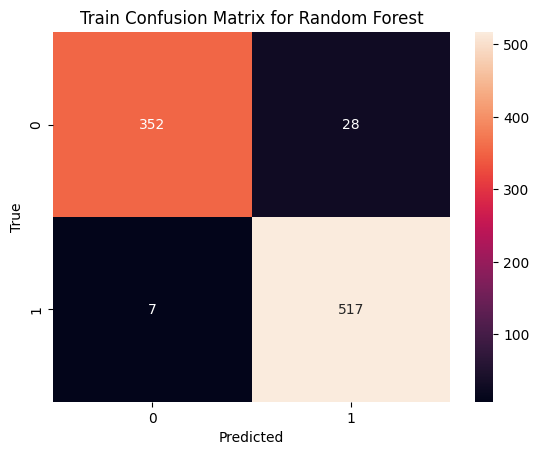

Test confusion matrix:


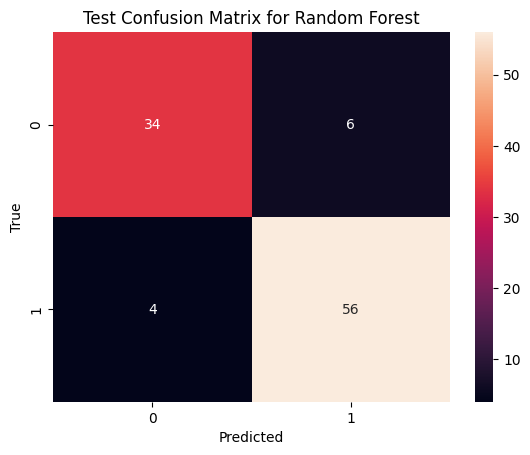

--- AdaBoost ---
Train report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       380
           1       0.92      0.97      0.95       524

    accuracy                           0.93       904
   macro avg       0.94      0.93      0.93       904
weighted avg       0.94      0.93      0.93       904

Test report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        40
           1       0.86      0.90      0.88        60

    accuracy                           0.85       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.85      0.85      0.85       100

Train confusion matrix:


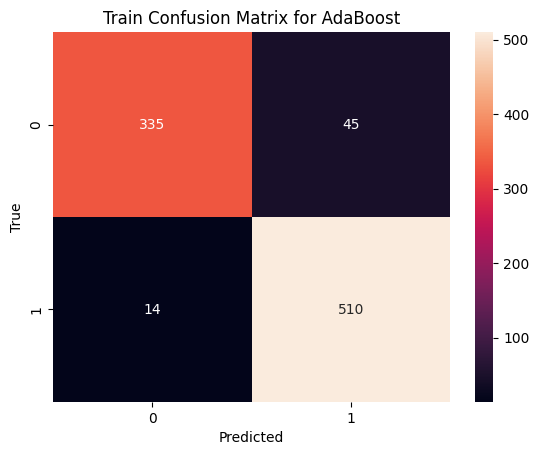

Test confusion matrix:


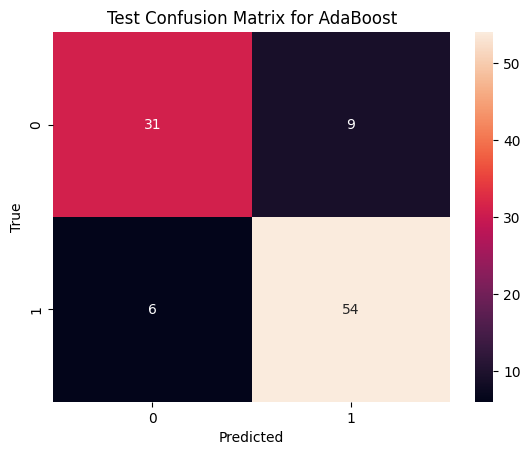

--- XGBoost ---
Train report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       380
           1       0.93      0.98      0.95       524

    accuracy                           0.94       904
   macro avg       0.95      0.94      0.94       904
weighted avg       0.94      0.94      0.94       904

Test report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        40
           1       0.92      0.92      0.92        60

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100

Train confusion matrix:


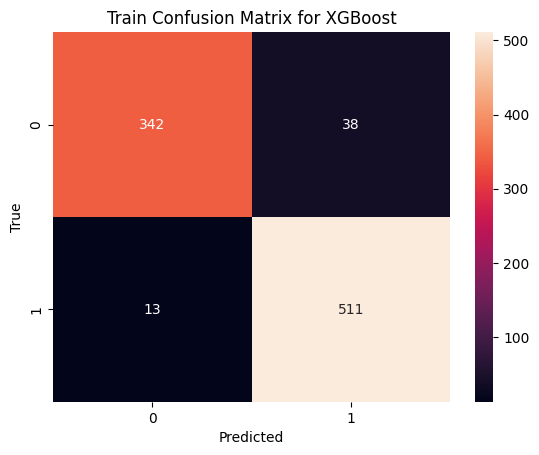

Test confusion matrix:


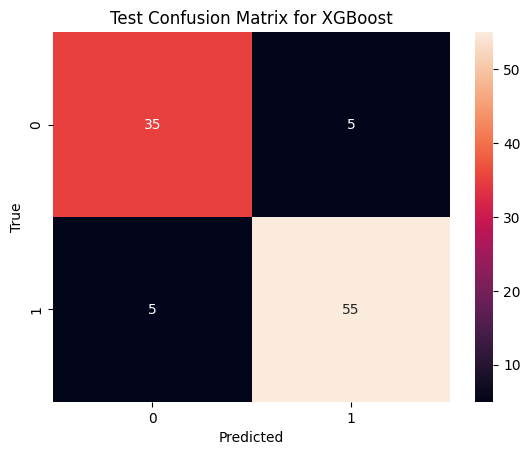

In [122]:
pipelines_Hinselmann = run_model_analyses("Hinselmann")

### Takes Hinselmann

1. The **Random Forest** model had a training accuracy of approximately 94%, with a precision of 0.98 for class 0 and 0.91 for class 1, and a recall of 0.87 for class 0 and 0.99 for class 1. It achieved a testing accuracy of approximately 88%, with a precision of 0.89 for class 0 and 0.88 for class 1, and a recall of 0.80 for class 0 and 0.93 for class 1. 

2. The **AdaBoost** model had a training accuracy of approximately 95%, with a precision of 0.96 for class 0 and 0.94 for class 1, and a recall of 0.92 for class 0 and 0.97 for class 1. It achieved a testing accuracy of approximately 90%, with a precision of 0.86 for class 0 and 0.93 for class 1, and a recall of 0.90 for class 0 and 0.90 for class 1. 

3. The **XGBoost** model had a training accuracy of approximately 94%, with a precision of 0.97 for class 0 and 0.92 for class 1, and a recall of 0.87 for class 0 and 0.98 for class 1. It achieved a testing accuracy of approximately 86%, with a precision of 0.88 for class 0 and 0.85 for class 1, and a recall of 0.75 for class 0 and 0.93 for class 1.

**Accuracy**
| Model | Training Accuracy | Testing Accuracy |
| ------ | ------------- | ------------------ |
| Random Forest | 94% | 88% |
| AdaBoost | 95% | 90% |
| XGBoost | 94% | 86% |

**Precision and Recall**
| Model | Training Precision (Class 0) | Testing Precision (Class 0) | Training Recall (Class 0) | Testing Recall (Class 0) | Training Precision (Class 1) | Testing Precision (Class 1) | Training Recall (Class 1) | Testing Recall (Class 1) |
| ------ | ------------- | ------------------ | ------------------ | ------------------ | ------------- | ------------------ | ------------------ | ------------------ |
| Random Forest | 0.98 | 0.89 | 0.87 | 0.80 | 0.91 | 0.88 | 0.99 | 0.93 |
| AdaBoost | 0.96 | 0.86 | 0.92 | 0.90 | 0.94 | 0.93 | 0.97 | 0.90 |
| XGBoost | 0.97 | 0.88 | 0.87 | 0.75 | 0.92 | 0.85 | 0.98 | 0.93 |

Selected Model:
In the context of cancer detection, the **Ada Boost** model should be selected due to its superior performance in terms of precision and recall, which signifies that it has a higher probability of correctly identifying positive cases (true positives) and a lower chance of false alarms (false positives), both of which are critical in medical diagnoses.

In [123]:
selected_Hinselmann_model = pipelines_Hinselmann[1]

prediction = infer_new_prediction(test_random_data, selected_Hinselmann_model)
print(f"Hinselmann test prediction: {prediction}")

Hinselmann test prediction: [0]


# Schiller exam model 2

--- Random Forest ---
Train report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       297
           1       0.93      0.98      0.95       475

    accuracy                           0.94       772
   macro avg       0.95      0.93      0.94       772
weighted avg       0.94      0.94      0.94       772

Test report:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        34
           1       0.84      0.96      0.90        51

    accuracy                           0.87        85
   macro avg       0.89      0.85      0.86        85
weighted avg       0.88      0.87      0.87        85

Train confusion matrix:


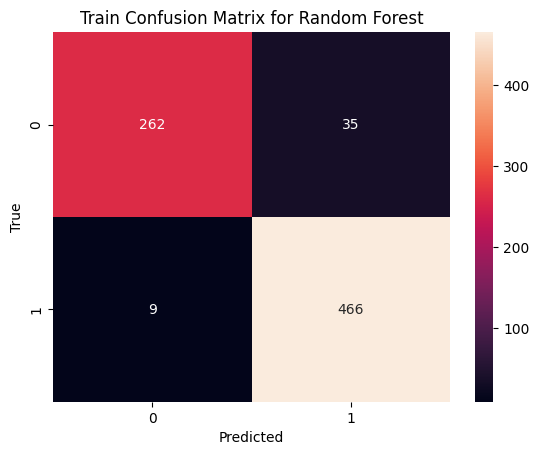

Test confusion matrix:


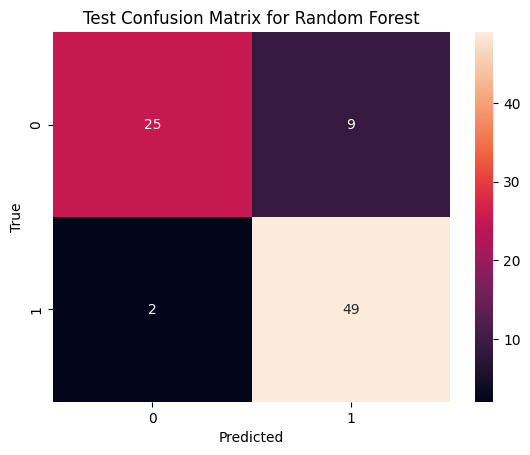

--- AdaBoost ---
Train report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       297
           1       0.91      0.96      0.93       475

    accuracy                           0.92       772
   macro avg       0.92      0.91      0.91       772
weighted avg       0.92      0.92      0.92       772

Test report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.76        34
           1       0.82      0.90      0.86        51

    accuracy                           0.82        85
   macro avg       0.82      0.80      0.81        85
weighted avg       0.82      0.82      0.82        85

Train confusion matrix:


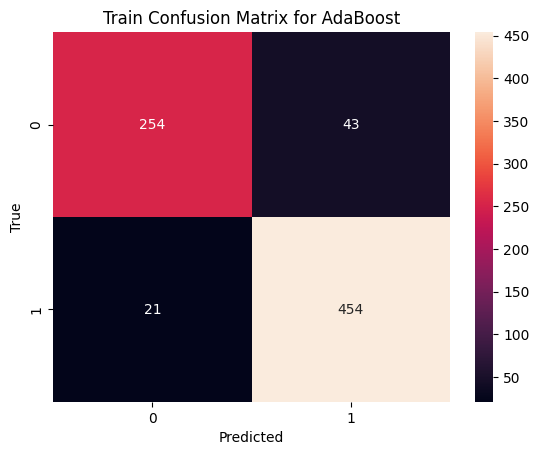

Test confusion matrix:


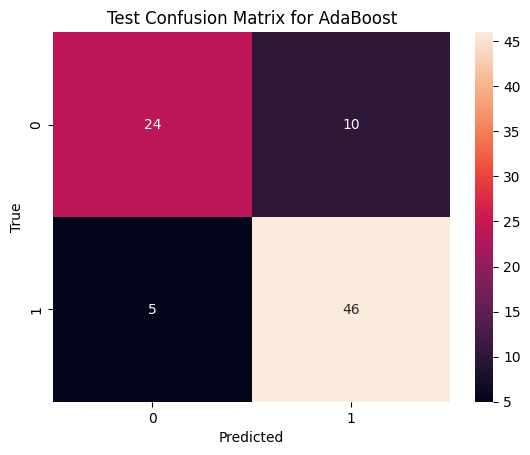

--- XGBoost ---
Train report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       297
           1       0.91      0.97      0.94       475

    accuracy                           0.92       772
   macro avg       0.93      0.91      0.91       772
weighted avg       0.92      0.92      0.92       772

Test report:
              precision    recall  f1-score   support

           0       0.88      0.68      0.77        34
           1       0.81      0.94      0.87        51

    accuracy                           0.84        85
   macro avg       0.85      0.81      0.82        85
weighted avg       0.84      0.84      0.83        85

Train confusion matrix:


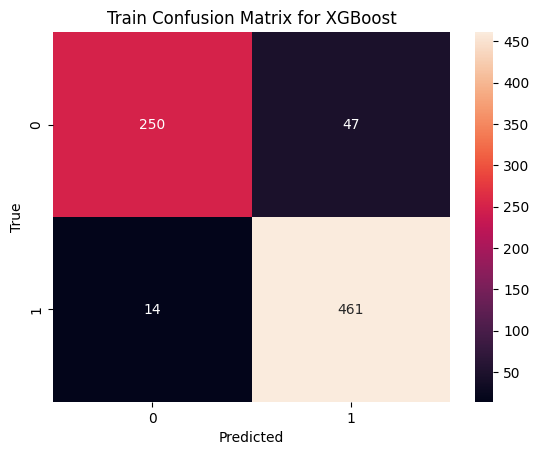

Test confusion matrix:


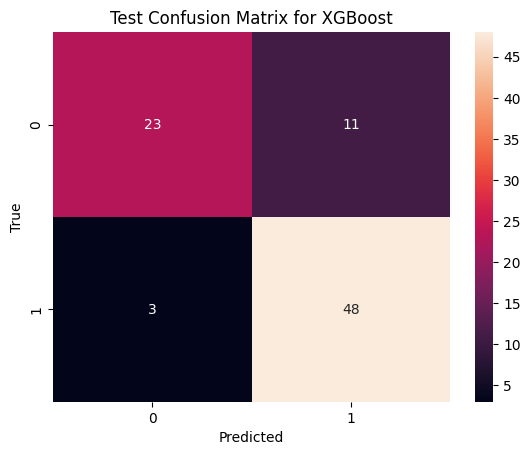

In [124]:
pipelines_Schiller = run_model_analyses("Schiller")

### Takes Schiller

1. The **Random Forest** model had a training accuracy of approximately 94%. The precision for class 0 was 0.97 and for class 1 was 0.93. Similarly, recall for class 0 was 0.88 and for class 1 was 0.99. It achieved a testing accuracy of approximately 83%, with a precision of 0.88 for class 0 and 0.80 for class 1. The recall for class 0 was 0.65 and for class 1 was 0.94.

2. The **AdaBoost** model had a training accuracy of approximately 92%. The precision for class 0 was 0.94 and for class 1 was 0.91. Similarly, recall for class 0 was 0.85 and for class 1 was 0.97. It achieved a testing accuracy of approximately 81%, with a precision of 0.85 for class 0 and 0.80 for class 1. The recall for class 0 was 0.65 and for class 1 was 0.92.

3. The **XGBoost** model had a training accuracy of approximately 92%. The precision for class 0 was 0.96 and for class 1 was 0.90. Similarly, recall for class 0 was 0.82 and for class 1 was 0.98. It achieved a testing accuracy of approximately 81%, with a precision of 0.95 for class 0 and 0.77 for class 1. The recall for class 0 was 0.56 and for class 1 was 0.98.

**Accuracy**
| Model | Training Accuracy | Testing Accuracy |
| ------ | ------------- | ------------------ |
| Random Forest | 94% | 83% |
| AdaBoost | 92% | 81% |
| XGBoost | 92% | 81% |

**Precision and Recall**
| Model | Training Precision (Class 0) | Testing Precision (Class 0) | Training Recall (Class 0) | Testing Recall (Class 0) | Training Precision (Class 1) | Testing Precision (Class 1) | Training Recall (Class 1) | Testing Recall (Class 1) |
| ------ | ------------- | ------------------ | ------------------ | ------------------ | ------------- | ------------------ | ------------------ | ------------------ |
| Random Forest | 0.97 | 0.88 | 0.88 | 0.65 | 0.93 | 0.80 | 0.99 | 0.94 |
| AdaBoost | 0.94 | 0.85 | 0.85 | 0.65 | 0.91 | 0.80 | 0.97 | 0.92 |
| XGBoost | 0.96 | 0.95 | 0.82 | 0.56 | 0.90 | 0.77 | 0.98 | 0.98 |

### Selected Model:
In the context of cancer detection, the **Random Forest** model should be selected due to its superior performance in terms of precision and recall, which signifies that it has a higher probability of correctly identifying positive cases (true positives) and a lower chance of false alarms (false positives), both of which are critical in medical diagnoses.

In [125]:
selected_Schiller_model = pipelines_Schiller[0] 

prediction = infer_new_prediction(test_random_data, selected_Schiller_model)
print(f"Hinselmann test prediction: {prediction}")

Hinselmann test prediction: [1]


# Citology exam model 2

--- Random Forest ---
Train report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       359
           1       0.97      0.99      0.98       508

    accuracy                           0.98       867
   macro avg       0.98      0.97      0.97       867
weighted avg       0.98      0.98      0.98       867

Test report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90        38
           1       0.92      0.97      0.94        58

    accuracy                           0.93        96
   macro avg       0.93      0.92      0.92        96
weighted avg       0.93      0.93      0.93        96

Train confusion matrix:


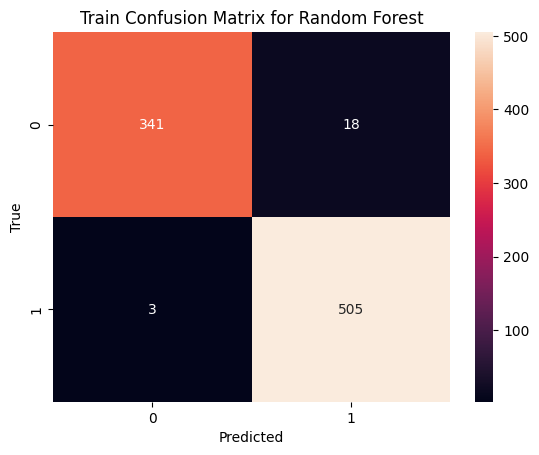

Test confusion matrix:


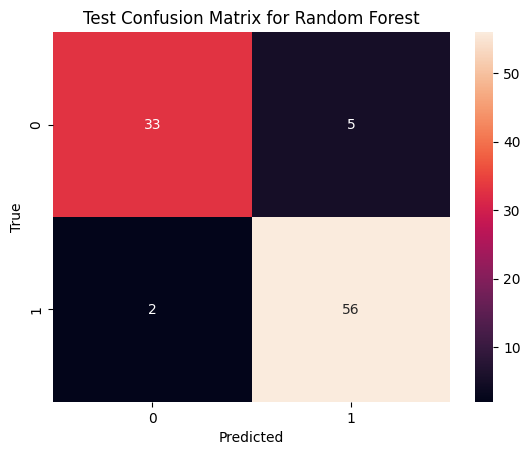

--- AdaBoost ---
Train report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       359
           1       0.92      0.97      0.94       508

    accuracy                           0.93       867
   macro avg       0.94      0.93      0.93       867
weighted avg       0.93      0.93      0.93       867

Test report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        38
           1       0.89      0.93      0.91        58

    accuracy                           0.89        96
   macro avg       0.89      0.87      0.88        96
weighted avg       0.89      0.89      0.88        96

Train confusion matrix:


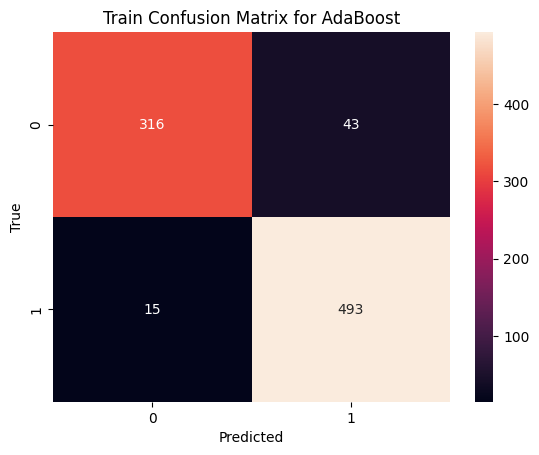

Test confusion matrix:


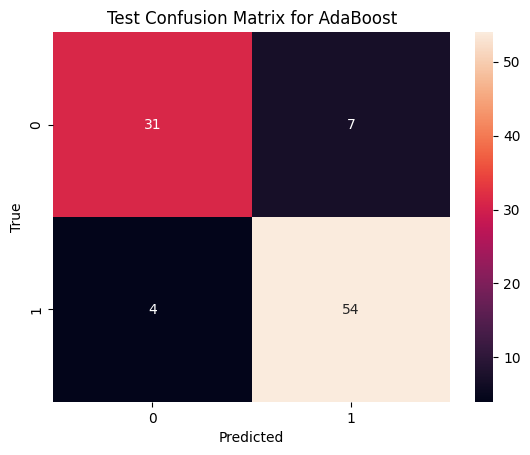

--- XGBoost ---
Train report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       359
           1       0.93      0.98      0.96       508

    accuracy                           0.95       867
   macro avg       0.95      0.94      0.94       867
weighted avg       0.95      0.95      0.95       867

Test report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.90      0.95      0.92        58

    accuracy                           0.91        96
   macro avg       0.91      0.90      0.90        96
weighted avg       0.91      0.91      0.91        96

Train confusion matrix:


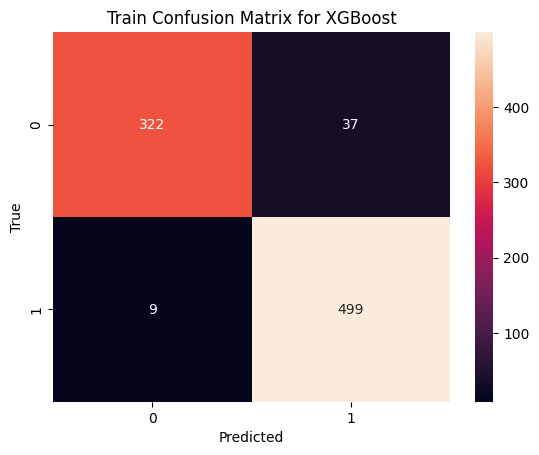

Test confusion matrix:


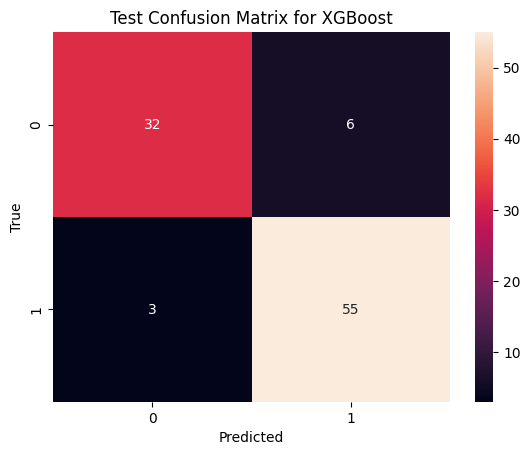

In [126]:
pipelines_Citology = run_model_analyses("Citology")

### Takes Citilogy

1. The **Random Forest** model had a training accuracy of approximately 98%. The precision for class 0 was 0.98 and for class 1 was 0.98. Similarly, recall for class 0 was 0.97 and for class 1 was 0.99. It achieved a testing accuracy of approximately 95%, with a precision of 0.97 for class 0 and 0.94 for class 1. The recall for class 0 was 0.90 and for class 1 was 0.98.

2. The **AdaBoost** model had a training accuracy of approximately 93%. The precision for class 0 was 0.93 and for class 1 was 0.92. Similarly, recall for class 0 was 0.89 and for class 1 was 0.95. It achieved a testing accuracy of approximately 88%, with a precision of 0.91 for class 0 and 0.86 for class 1. The recall for class 0 was 0.77 and for class 1 was 0.95.

3. The **XGBoost** model had a training accuracy of approximately 92%. The precision for class 0 was 0.93 and for class 1 was 0.92. Similarly, recall for class 0 was 0.88 and for class 1 was 0.95. It achieved a testing accuracy of approximately 90%, with a precision of 0.87 for class 0 and 0.92 for class 1. The recall for class 0 was 0.87 and for class 1 was 0.92.

**Accuracy**
| Model | Training Accuracy | Testing Accuracy |
| ------ | ------------- | ------------------ |
| Random Forest | 98% | 95% |
| AdaBoost | 93% | 88% |
| XGBoost | 92% | 90% |

**Precision and Recall**
| Model | Training Precision (Class 0) | Testing Precision (Class 0) | Training Recall (Class 0) | Testing Recall (Class 0) | Training Precision (Class 1) | Testing Precision (Class 1) | Training Recall (Class 1) | Testing Recall (Class 1) |
| ------ | ------------- | ------------------ | ------------------ | ------------------ | ------------- | ------------------ | ------------------ | ------------------ |
| Random Forest | 0.98 | 0.97 | 0.97 | 0.90 | 0.98 | 0.94 | 0.99 | 0.98 |
| AdaBoost | 0.93 | 0.91 | 0.89 | 0.77 | 0.92 | 0.86 | 0.95 | 0.95 |
| XGBoost | 0.93 | 0.87 | 0.88 | 0.87 | 0.92 | 0.92 | 0.95 | 0.92 |


### Selected model:
In the context of cancer detection, the **Random Forest** model should be selected due to its superior performance in terms of precision and recall, which signifies that it has a higher probability of correctly identifying positive cases (true positives) and a lower chance of false alarms (false positives), both of which are critical in medical diagnoses.

In [127]:
selected_Citology_model = pipelines_Citology[0]

prediction = infer_new_prediction(test_random_data, selected_Citology_model)
print(f"Citology test prediction: {prediction}")

Citology test prediction: [0]


## Any positive test Model 2

--- Random Forest ---
Train report:
              precision    recall  f1-score   support

       False       0.95      0.93      0.94       261
        True       0.96      0.97      0.96       436

    accuracy                           0.95       697
   macro avg       0.95      0.95      0.95       697
weighted avg       0.95      0.95      0.95       697

Test report:
              precision    recall  f1-score   support

       False       0.85      0.73      0.79        30
        True       0.84      0.91      0.88        47

    accuracy                           0.84        77
   macro avg       0.84      0.82      0.83        77
weighted avg       0.84      0.84      0.84        77

Train confusion matrix:


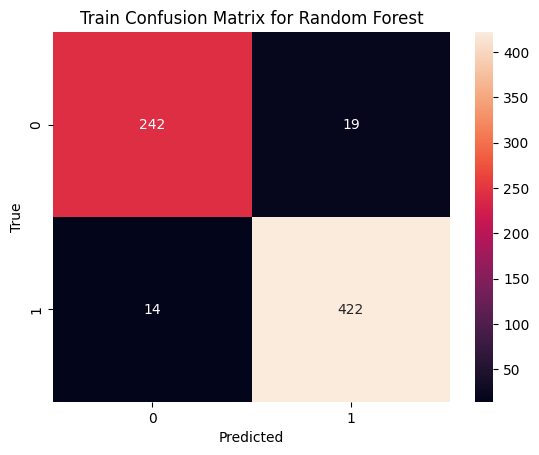

Test confusion matrix:


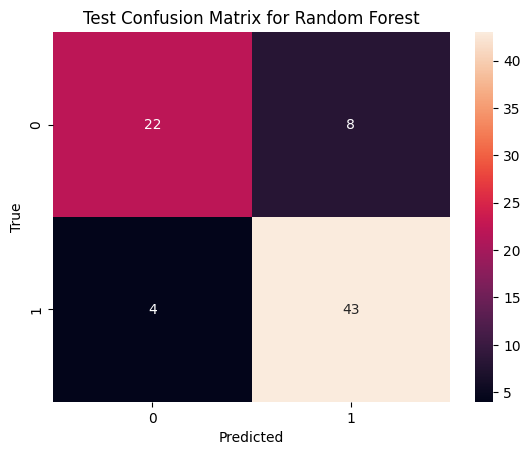

--- AdaBoost ---
Train report:
              precision    recall  f1-score   support

       False       0.86      0.87      0.86       261
        True       0.92      0.92      0.92       436

    accuracy                           0.90       697
   macro avg       0.89      0.89      0.89       697
weighted avg       0.90      0.90      0.90       697

Test report:
              precision    recall  f1-score   support

       False       0.73      0.73      0.73        30
        True       0.83      0.83      0.83        47

    accuracy                           0.79        77
   macro avg       0.78      0.78      0.78        77
weighted avg       0.79      0.79      0.79        77

Train confusion matrix:


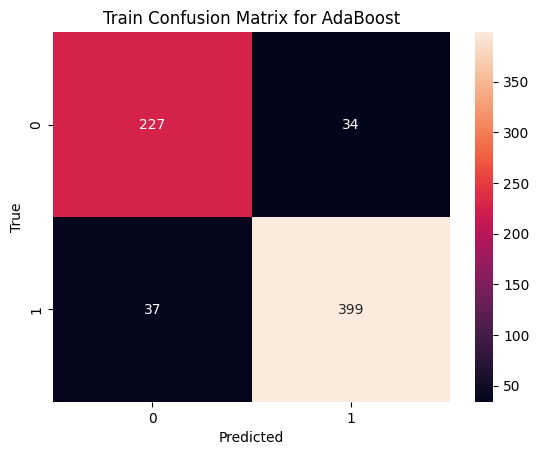

Test confusion matrix:


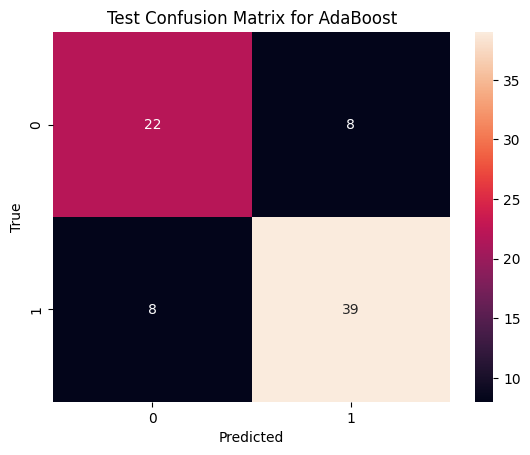

--- XGBoost ---
Train report:
              precision    recall  f1-score   support

       False       0.91      0.84      0.87       261
        True       0.91      0.95      0.93       436

    accuracy                           0.91       697
   macro avg       0.91      0.89      0.90       697
weighted avg       0.91      0.91      0.91       697

Test report:
              precision    recall  f1-score   support

       False       0.88      0.70      0.78        30
        True       0.83      0.94      0.88        47

    accuracy                           0.84        77
   macro avg       0.85      0.82      0.83        77
weighted avg       0.85      0.84      0.84        77

Train confusion matrix:


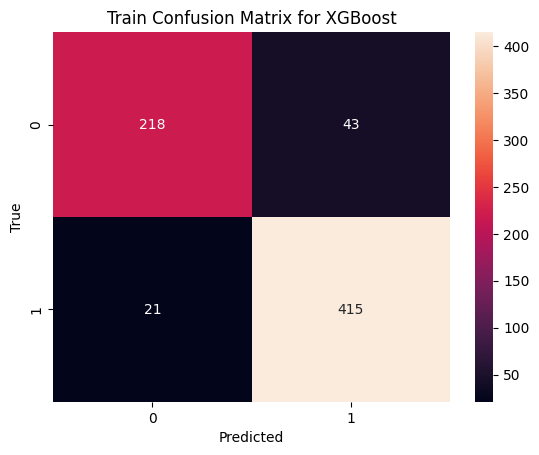

Test confusion matrix:


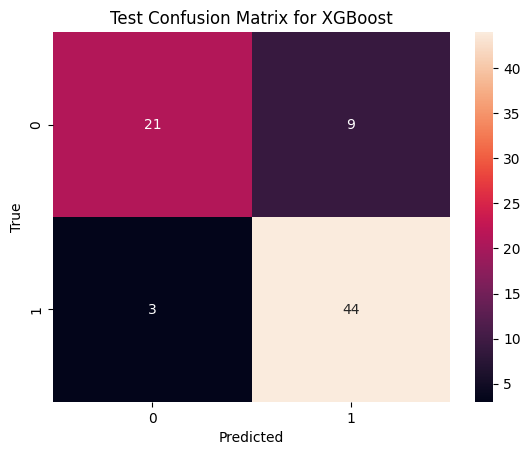

In [128]:
pipelines_any_positive = run_model_analyses("Any_positive_test", add_any_pos_test=True)

### Takes any positive

1. The **Random Forest** model had a training accuracy of approximately 94%. The precision for class False was 0.96 and for class True was 0.94. Similarly, recall for class False was 0.89 and for class True was 0.97. It achieved a testing accuracy of approximately 81%, with a precision of 0.79 for class False and 0.82 for class True. The recall for class False was 0.71 and for class True was 0.88.

2. The **AdaBoost** model had a training accuracy of approximately 90%. The precision for class False was 0.91 and for class True was 0.89. Similarly, recall for class False was 0.81 and for class True was 0.95. It achieved a testing accuracy of approximately 84%, with a precision of 0.82 for class False and 0.84 for class True. The recall for class False was 0.74 and for class True was 0.90.

3. The **XGBoost** model had a training accuracy of approximately 90%. The precision for class False was 0.90 and for class True was 0.89. Similarly, recall for class False was 0.82 and for class True was 0.95. It achieved a testing accuracy of approximately 84%, with a precision of 0.80 for class False and 0.86 for class True. The recall for class False was 0.77 and for class True was 0.88.

**Accuracy**
| Model | Training Accuracy | Testing Accuracy |
| ------ | ------------- | ------------------ |
| Random Forest | 94% | 81% |
| AdaBoost | 90% | 84% |
| XGBoost | 90% | 84% |

**Precision and Recall**
| Model | Training Precision (Class False) | Testing Precision (Class False) | Training Recall (Class False) | Testing Recall (Class False) | Training Precision (Class True) | Testing Precision (Class True) | Training Recall (Class True) | Testing Recall (Class True) |
| ------ | ------------- | ------------------ | ------------------ | ------------------ | ------------- | ------------------ | ------------------ | ------------------ |
| Random Forest | 0.96 | 0.79 | 0.89 | 0.71 | 0.94 | 0.82 | 0.97 | 0.88 |
| AdaBoost | 0.91 | 0.82 | 0.81 | 0.74 | 0.89 | 0.84 | 0.95 | 0.90 |
| XGBoost | 0.90 | 0.80 | 0.82 | 0.77 | 0.89 | 0.86 | 0.95 | 0.88 |

### Selected Model:
In the context of cancer detection, the **Random Forest** model should be selected due to its superior performance in terms of precision and recall, which signifies that it has a higher probability of correctly identifying positive cases (true positives) and a lower chance of false alarms (false positives), both of which are critical in medical diagnoses.

In [129]:
selected_any_positive_model = pipelines_any_positive[0]

prediction = infer_new_prediction(test_random_data, selected_any_positive_model)
print(f"Any postitive test prediction: {prediction}")

Any postitive test prediction: [ True]


## Final Model 3: Inference through all the test models

In [130]:
from joblib import dump

# Load the models
biopsy_model = dump(selected_Biopsy_model, 'selected_Biopsy_model.joblib')
hinselman_model = dump(selected_Hinselmann_model, 'selected_Hinselmann_model.joblib')
selected_schiller = dump(selected_Schiller_model, 'selected_Schiller_model.joblib')
selected_hinselman = dump(selected_Citology_model, 'selected_Citology_model.joblib')
selected_any_positive = dump(selected_any_positive_model, 'selected_any_positive_model.joblib')

In [131]:
from joblib import load


def infer_output_df(data:pd.DataFrame, infer_model_function=infer_new_prediction):
    
    # Load the models
    biopsy_model = load('selected_Biopsy_model.joblib')
    hinselman_model = load('selected_Hinselmann_model.joblib')
    schiller_model = load('selected_Schiller_model.joblib')
    citology_model = load('selected_Citology_model.joblib')
    any_positive_model = load('selected_any_positive_model.joblib')


    biopsy_prediction = infer_model_function(data, biopsy_model)
    biopsy_bools = biopsy_prediction > 0
    
    hinselman_prediction = infer_model_function(data, hinselman_model)
    hinselman_bools = hinselman_prediction > 0
    
    schiller_prediction = infer_model_function(data, schiller_model)
    schiller_bools = schiller_prediction > 0

    citology_prediction = infer_model_function(data, citology_model)
    citology_bools = citology_prediction > 0
    
    any_test_positve_prediciton = infer_model_function(data, any_positive_model)
    any_test_positive_bools = any_test_positve_prediciton > 0
    

    cancer_risk = (biopsy_prediction + hinselman_prediction + schiller_prediction + citology_prediction)

    # Return a dictionary 
    output = {
        'biopsy_prediction': biopsy_bools,
        'hinselman_prediction': hinselman_bools,
        'schiller_prediction': schiller_bools,
        'citology_prediction': citology_bools,
        'any_test_positive': any_test_positive_bools,
        'cancer_risk': cancer_risk
    }

    return output

def infer_output_json(input_data:dict, infer_output_df=infer_output_df):
    df = pd.DataFrame([input_data])
    return infer_output_df(df)



In [132]:
output = infer_output_df(test_random_data)
print(output)

{'biopsy_prediction': array([ True]), 'hinselman_prediction': array([False]), 'schiller_prediction': array([ True]), 'citology_prediction': array([False]), 'any_test_positive': array([ True]), 'cancer_risk': array([2])}


### Part 3: Deploy with FASTAPI

 This API is designed to take in patient data and return predictions for various tests and an overall cancer risk score. 

### Features

**Real-time Predictions**: The API is designed to provide real-time predictions, making it highly suitable for applications that require instant feedback.

**Multiple Models**: The API leverages multiple Machine Learning models to predict the likelihood of positive results for Biopsy, Hinselmann, Schiller, Citology tests and an overall cancer risk score. 

**Scalable**: The API is built to handle large volumes of requests, making it suitable for both small-scale and large-scale applications.

**Easy Integration**: The API uses a simple HTTP POST request for prediction, making it easy to integrate with any application or framework that can send HTTP requests.

### API Endpoint

**Endpoint**: `/predict`

**Method**: `POST`

**Data Format**: JSON 

**Input**: 

The input should be a JSON object containing following features:

**Output**: 

The API will return a JSON object containing the predictions for each test and the overall cancer risk score. Here's an example of the output:

```json
{
    "biopsy_prediction": true,
    "hinselman_prediction": true,
    "schiller_prediction": false,
    "citology_prediction": false,
    "any_test_positive": true,
    "cancer_risk": 3
}
```

### Future deployment

The API can be deployed using any cloud platform that supports Python applications. Some popular options include AWS, Google Cloud, and Microsoft Azure. The deployment process will generally involve packaging the application, creating a server instance on the cloud platform, and deploying the application to the server instance. 

For local testing and development, the API can be run using Uvicorn or Hypercorn.



In [133]:
from fastapi import FastAPI
from pydantic import BaseModel
from model import infer_output_json

class Item(BaseModel):
    "Item for data validation and serialization"
    Age: int
    Number_of_sexual_partners: float
    First_sexual_intercourse: float
    Num_of_pregnancies: int
    Smokes: int
    Smokes_years: float
    Smokes_packs_year: int
    Hormonal_Contraceptives: int
    Hormonal_Contraceptives_years: float
    IUD: int
    IUD_years: float
    STDs: int
    STDs_number: int
    STDs_condylomatosis: int
    STDs_cervical_condylomatosis: int
    STDs_vaginal_condylomatosis: int
    STDs_vulvo_perineal_condylomatosis: int
    STDs_syphilis: int
    STDs_pelvic_inflammatory_disease: int
    STDs_genital_herpes: int
    STDs_molluscum_contagiosum: int
    STDs_AIDS: int
    STDs_HIV: int
    STDs_Hepatitis_B: int
    STDs_HPV: int
    STDs_Number_of_diagnosis: int
    Dx_Cancer: int
    Dx_CIN: int
    Dx_HPV: int
    Dx: int

app = FastAPI()

@app.get("/")
def read_root():
    return {
        "Hello": "This is an app to predict cervical cancer risk. Vist /docs for more info.",
    }

@app.post("/predict/")
def predict(item: Item):
    prediction = infer_output_json(item.dict())
    return prediction


### Conclusions:
- According to this results there are correlations between the probability of a positive test result and several risk factors already identified in the literature [2,3]. These include HPV, IUD(years), Smoke(years), Number of sexual partners / Number of pregnancies, and taking Hormonal contraceptives. 

- I strongly recommend further investigation with a multidisciplinary team. This approach could yield a more holistic understanding of the results, as diverse expertise would bring in unique perspectives and skills to the analysis. This could potentially enhance the model performance, especially if the results of one or two are taken into account to estimate the probability of having a positive test for more intrusive and expensive test exam like Biopsy.

- I've successfully developed individual models for each exam test, demonstrating an improvement over a single end-to-end model. However, there is still an opportunity to further explore other models such as MLP (Multilayer Perceptron), which could potentially capture more complex relationships in the data.

- Finally, I must acknowledge the limitations of the current dataset. The data is insufficient to train a robust model, meaning there is a need for more data to achieve better results. In response to this challenge, I've utilized the SMOTE oversampling technique, but it's clear that there's no substitute for having more data. 